# Linear Algebra in 2D plane

## Basic concepts

The 2D world is flat like a piece of paper. In Math terms, the 2D space is referred to as a *plane*.

An object living in this 2D plane has two dimensions (height and width), but has no depth.

To describe the location of points in the 2D plane you need a reference point, what we call the **origin**.

A **2D vector** is a point in the plane relative to the origin.

To measure in 2D, we need **axes** (plural of axis). We lay them out in plane, perpendicular to each other, intersecting at the origin.

We can use the `vec2d` library to draw figures on the 2D plane. 

Note that before using the libary, you have to make sure that the `.vscodes/settings.json` includes the path to the vec2d library directory in the `python.analysis.extraPaths`:

```json
 {
  "python.analysis.extraPaths": [
    "\"./lib\"",
    "/home/ubunt/anaconda3/bin",
    "/home/ubuntu/anaconda3/lib/python3.8/site-packages",
    "./part_2-math/02_mini-projects/02_vector-2d-lib-refactoring"
  ]
}
```

Also, don't forget to create a symbolic link in the current directory to the directory containing the sources of the `vec3d` library.

```bash
ln -s ../../02_mini-projects/02_vector-2d-lib-refactoring/vec2d vec2d
```

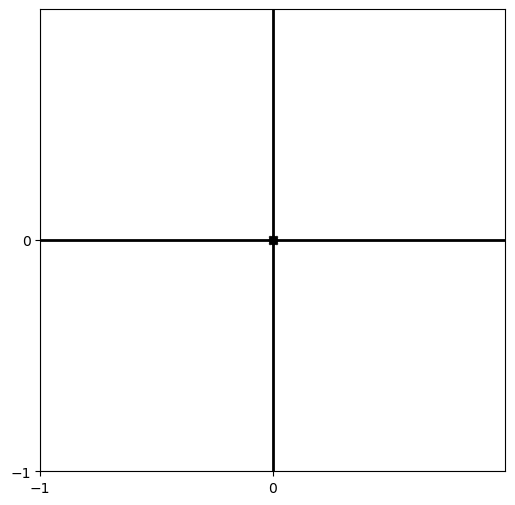

In [2]:
from vec2d.graph import Points, draw

draw(Points((0, 0)))


The horizontal axis is called the **x-axis**, and the vertical one is called the **y-axis**.

Given a point in the 2D plane, we can uniquely identify with a pair of numbers **x-coordinate** and **y-coordinate** that give us the location of the point relative to the origin.

There are three mental models that are helpful to visualize vectors in the 2D plane:
1. an ordered pair of numbers (x- and y-coordinate). E.g., $ (6, 4) $

2. A point in the plane relative to the origin.

    ![Point in 2D](pics/point-2d.png)

3. An arrow of specific length in a specific direction.

    ![Arrow in 2D](pics/arrow-2d.png)

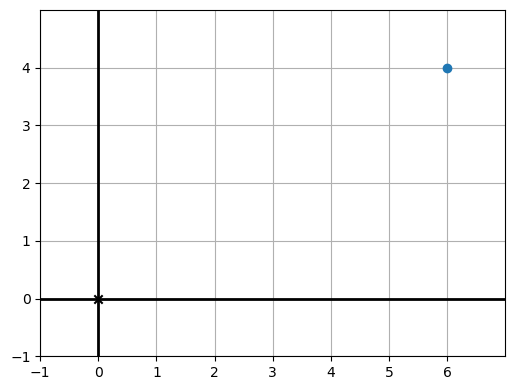

In [3]:
from vec2d.graph import Points, Colors, draw

draw(
    Points((6, 4), color=Colors.BLUE)
)

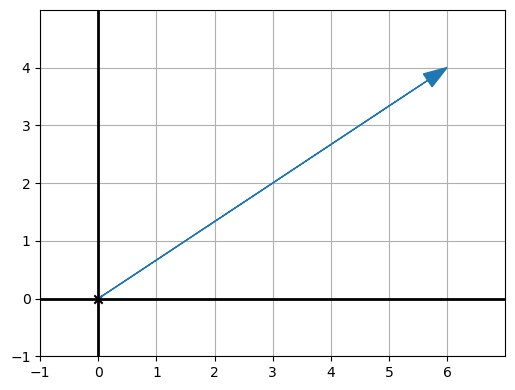

In [4]:
from vec2d.graph import Arrow, draw, Colors

draw(
    Arrow((6, 4), color=Colors.BLUE)
)

## 2D Drawing in Python

In the rest of the section we will be using a simple library `vec2d.graph` that provides support to draw simple figures such as points, segments, polygons, and arrows in the 2D plane using Matplotlib as the backend. The `vec2d` library also provides a `vec2d.math` package to handle Math related functions for 2D plane elements.

The library also provides classes for the figures, an enumeration for the common colors, and a function `draw` to render the figures.

The following table lists the geometric figures usable with the `draw` function:

| Class | Constructor example | Description |
| :---- | :------------------ | :---------- |
| `Polygon` | `Polygon(*vectors)` | Draws a polygon whose vertices (plural of vertex) are represented by the given list of vectors. |
| `Points` | `Points(*vectors)` | Represents a list of points (i.e., dots), one at each of the input vectors. |
| `Arrow` | `Arrow(tip)`<br>`Arrow(tip, tail)` | Draws an arrow from the origin to the `tip` vector, or from the `tail` vector to the `tip` vector if `tail` if given. |
| `Segment` | `Segment(start, end)` | Draws a line segment from the start to the vector end. |

### Exercise

Use the `vec2d` library to replicate the following drawing.

![dino](pics/dino.png)

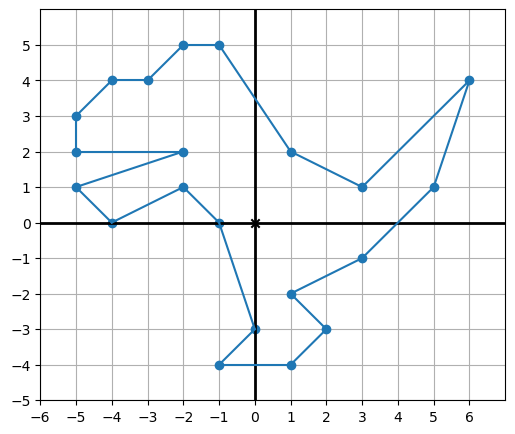

In [6]:
from vec2d.graph import Polygon, Points, draw, Colors

dino_points = [
    (-1, 0),
    (-2, 1),
    (-4, 0),
    (-5, 1),
    (-2, 2),
    (-5, 2),
    (-5, 3),
    (-4, 4),
    (-3, 4),
    (-2, 5),
    (-1, 5),
    (1, 2),
    (3, 1),
    (6, 4),
    (5, 1),
    (3, -1),
    (1, -2),
    (2, -3),
    (1, -4),
    (-1, -4),
    (0, -3)
]

draw(
    Points(*dino_points, color=Colors.BLUE),
    Polygon(*dino_points)
)

### Exercise

What are the x- and y- coordinates of the point at the tip of the dinosaur's toe?

The dinosaur's toe tip is at $ (-1, -4) $.

### Exercise

Draw the point in the plane and the arrow corresponding to the point $ (2, -2) $.

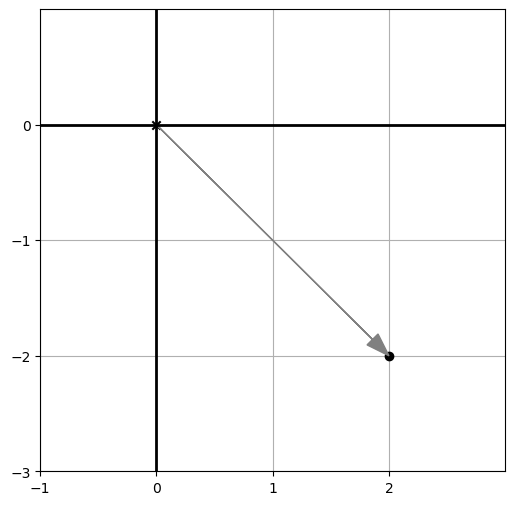

In [7]:
from vec2d.graph import draw, Arrow, Points, Colors

draw(
    Points((2, -2)),
    Arrow((2, -2), color=Colors.GRAY)
)

### Exercise

Draw the vectors `(x, x ** 2)` for `x` in the range from `x=-10` to `x=11` as dots using the `draw` function. What is the result.

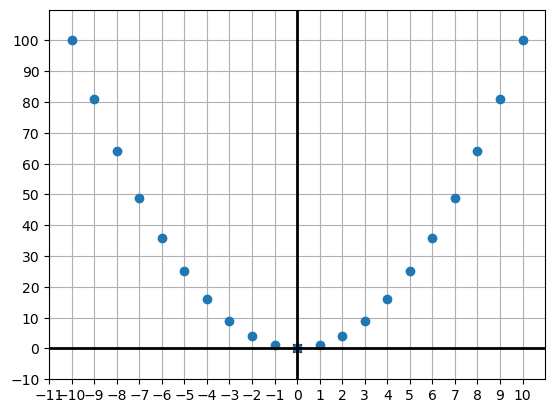

In [8]:
from vec2d.graph import draw, Points, Colors

points = [(x, x ** 2) for x in range(-10, 11)]

draw(
    Points(*points, color=Colors.BLUE),
    grid=(1, 10),
    nice_aspect_ratio=False
)

Note how we used a custom value for `grid` and `nice_aspect_ratio` to get a pretty representation for the $ y = x^{2} $ function.

## Plane vector arithmetic

Like numbers, vectors in the 2D plane have their own kind of arithmetic &mdash; they can be combined with operations to make new vectors.

Additionally, in 2D plane, these operations can be visualized and understood as geometric transformations in the plane.

Vector addition is the first of these operations. You can add two vectors to obtain the **vector sum** of the original vector by simple adding their corresponding x- and y-coordinates.

$$
\vec{v}_{sum} = \vec{v}_{1} + \vec{v}_{2} = (x_1, y_1) + (x_2, y_2) = (x_1 + x_2, y_1 + y_2)
$$


The geometric representation of the **vector sum** is the vector that results of putting the second vector at the tip of the first one, as seen on the picture below:

Vector_sum=(3, 4)


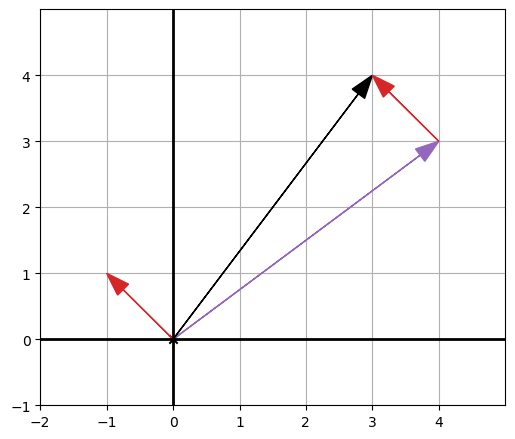

In [9]:
from vec2d.graph import draw, Arrow, Colors

def add(v1: tuple[int | float, int | float], v2: tuple[int | float, int | float]):
    return (v1[0] + v2[0], v1[1] + v2[1])

v1 = (4, 3)
v2 = (-1, 1)
vector_sum = add((4, 3), (-1, 1))
print(f"Vector_sum={add(v1, v2)}")

draw(
    Arrow(v1, color=Colors.PURPLE),
    Arrow(v2, color=Colors.RED),
    Arrow(vector_sum, color=Colors.BLACK),
    Arrow(vector_sum, v1, color=Colors.RED)
)

The following diagram is the explanation:

![vector sum: geometric representation](pics/vector_sum_2d.png)

This *tip-to-tail* representation of vector addition demonstrates that adding two vectors is like traversing one vector and then the other.

That is, it gives us the net distance and direction traveled in the plane when first going through vector one (purple one) and then the (red one): the net distance and direction traveled is given by the black vector.

In our example, the result of traversing $ (4, 3) $ and then $ (-1, 1) $ is like traversing from the origin to the point $ (-3, 4) $.

Apart from what is discussed in the previous paragraph, adding a vector has the effect of moving or *translating* an existing point.

For example, if we add the vector $ (-1.5, -2.5) $ to every vector of the dino figure, we will end up with a new dino that has been moved/translated 1.5 units to the left and 2.5 units down.

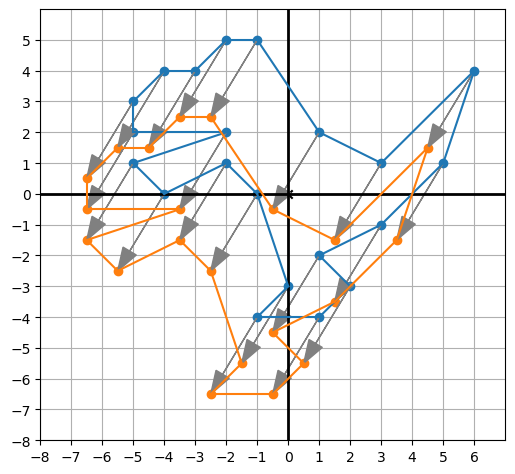

In [10]:
from vec2d.graph import Polygon, Points, draw, Arrow, Colors
from vec2d.math import add

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

translation_vector = (-1.5, -2.5)
dino_points_2 = [add(v, translation_vector) for v in dino_points]

arrows = [Arrow(tip, tail, color=Colors.GRAY) for tip, tail in zip(dino_points_2, dino_points)]

draw(
    Points(*dino_points, color=Colors.BLUE),
    Polygon(*dino_points),
    Points(*dino_points_2, color=Colors.ORANGE),
    Polygon(*dino_points_2, color=Colors.ORANGE),
    *arrows
)

Therefore, translation (which is nothing more than adding a corresponding translation vector to each and every point of a polygon) is useful for moving sprites on the screen.

### Vector components and lengths

Any 2D vector can be represented as the sum of a vector pointing in the $ x $ direction and a vector pointing in the $ y $ direction.

As an example, the vector $ (4, 3) $ can be represented as $ (4, 0) + (0, 3) $.

This graphically demonstrated below:

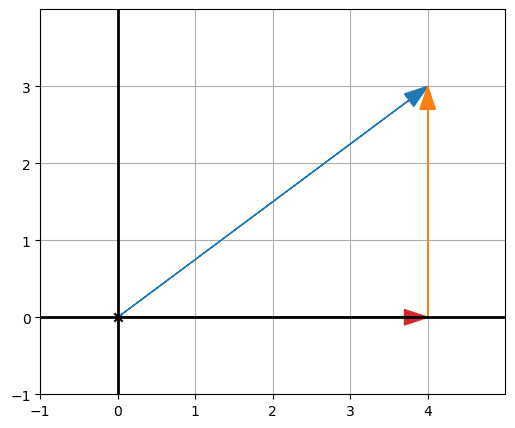

In [15]:
from vec2d.graph import Arrow, Colors
from vec2d.math import add

v = (4, 3)
v1 = (4, 0)
v2 = (0, 3)


draw(
    Arrow(v, color=Colors.BLUE),
    Arrow(v1, color=Colors.RED),
    Arrow(v, v1, color=Colors.ORANGE)
)

Those two vectors $ (4, 0) $ and $ (0, 3) $ are called the $ x $ and $ y $ components of the vector $ (4, 3) $.

The length of the vector is the length of the arrow that represents it.

To calculate the length, we need to use the *Pythagorean theorem*:
> For a right triangle (a triangle having two sides meeting at a 90° angle), the square of the longest side (*hypotenuse*) is the sum of the squares of the other two sides.

![Pythagorean theorem](pics/pythagorean_theorem.png)

Thus, we can calculate the length of the vector with:

In [16]:
from math import sqrt

v = (4, 3)
v_length = sqrt(v[0] ** 2 + v[1] ** 2)
v_length

5.0

Or using our `vec2d.math` library:


In [1]:
from vec2d.math import length

length((4, 3))

5.0

### Multiplying vectors by numbers

Geometrically, multiplying vectors by numbers is the same as the repeated addition of vectors. As a result, it will be the same as stacking vectors using the *tip-to-tail*.

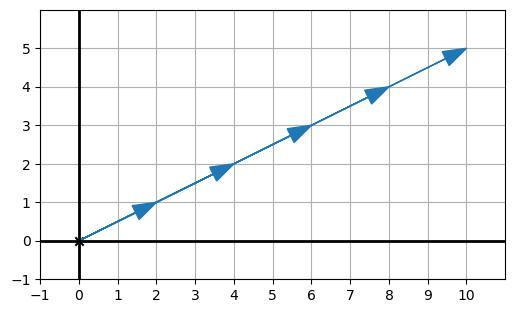

In [4]:
from vec2d.math import add
from vec2d.graph import draw, Arrow, Colors

v = (2, 1)
v2 = add(v, v)
v3 = add(v2, v)
v4 = add(v3, v)
v5 = add(v4, v) # same as v + v + v + v + v


draw(
    Arrow(v, color=Colors.BLUE),
    Arrow(v2, color=Colors.BLUE),
    Arrow(v3, color=Colors.BLUE),
    Arrow(v4, color=Colors.BLUE),
    Arrow(v5, color=Colors.BLUE)
)

Note that if $ v = (2, 1) $, $ v + v + v + v + v = (10, 5) $.

Because of this, there's no reason why we can't write:

$$
v + v + v + v + v = 5 \cdot v
$$

The operation of multiplying a vector by a number is called *scalar multiplication*, as when working with vectors, ordinary numbers are often referred to as *scalars*.

Note also that if the effect of vector addition was *translation*, the effect of *scalar product* is *scaling*.

If we multiply a vector by a factor (e.g., 2.5) the net result would be the scaling the original vector the corresponding factor (e.g., 2.5 times larger):

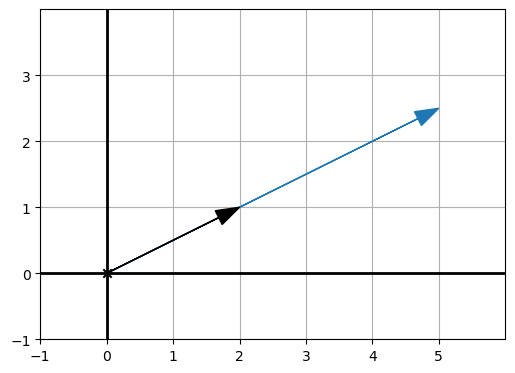

In [7]:
from vec2d.math import add
from vec2d.graph import draw, Arrow, Colors

v = (2, 1)
s = 2.5

scaled_vector = (v[0] * s, v[1] * s)

draw(
    Arrow(scaled_vector, color=Colors.BLUE),
    Arrow(v, color=Colors.BLACK)
)

The result on the vector components when doing an scalar multiplication, is that each component is *scaled* by the given factor:

2023-09-29 15:57:19,367 [    INFO] (vec2d.graph.vector2d_graphics) | Using vec2d.graph v0.1.0


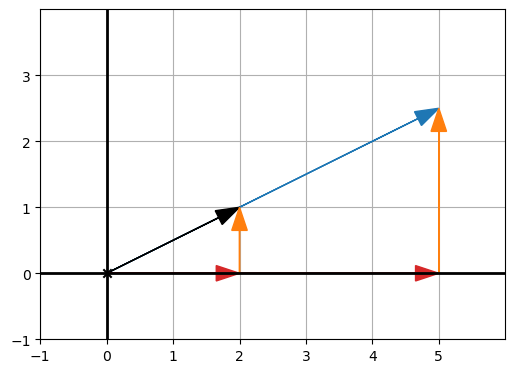

In [1]:
from vec2d.graph import draw, Arrow, Colors

v = (2, 1)
s = 2.5

scaled_vector = (v[0] * s, v[1] * s)

draw(
    Arrow(scaled_vector, color=Colors.BLUE),
    Arrow((scaled_vector[0], 0), color=Colors.RED),
    Arrow(scaled_vector, (scaled_vector[0], 0), color=Colors.ORANGE),
    Arrow(v, color=Colors.BLACK),
    Arrow((v[0], 0), color=Colors.RED),
    Arrow(v, (v[0], 0), color=Colors.ORANGE)

)

When using a negative scalar, the net effect is that we make the vector points to the opposite direction with respect to the original:

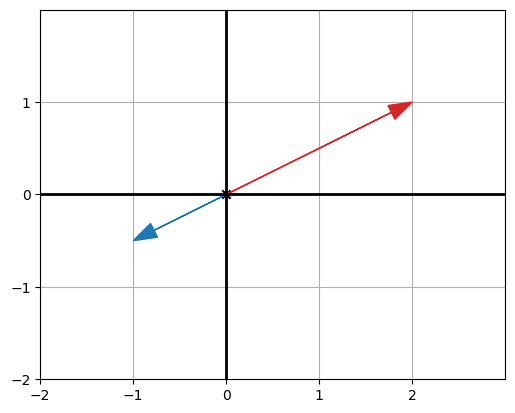

In [3]:
from vec2d.math import scalar_product
from vec2d.graph import draw, Arrow, Colors

v = (2, 1)
s = -1 / 2

scaled_vector = scalar_product(v, s)

draw(
    Arrow(v, color=Colors.RED),
    Arrow(scaled_vector, color=Colors.BLUE),
)

### Subtraction, displacement, and distance

Given a vector $ v $, the opposite vector $ -v $, is the same as $ -1 \cdot v $.

In algebraic terms, the opposite of a vector results from multiplying each coordinate by -1. Geometrically, it is a vector with the same length as the original one, but that points in the exact opposite direction.

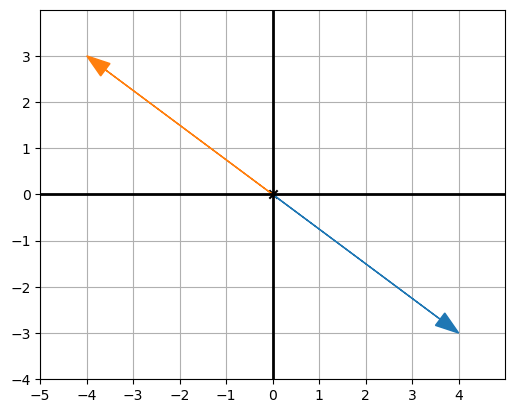

In [3]:
from vec2d.math import scalar_product, opposite, length
from vec2d.graph import draw, Arrow, Colors

v = (-4, 3)
opposite_v1 = opposite(v)
opposite_v2 = (v[0] * -1, v[1] * -1)
opposite_v3 = scalar_product(v, -1)

assert opposite_v1 == opposite_v2
assert opposite_v2 == opposite_v3
assert opposite_v1 == opposite_v3

assert length(v) == length(opposite(v))

draw(
    Arrow(v, color=Colors.ORANGE),
    Arrow(opposite(v), color=Colors.BLUE)
)



Vector subtraction can then be defined on the basis of the *opposite* of a vector:

$$
v - w = v + (-w)
$$

Algebraically then, 

$$
 v - w = (v_x, v_y) - (w_x, w_y) = (v_x - w_x, v_y - w_y)
$$ 

The geometric representation of the vector subtraction is a vector that goes from the second vector to the first one can be derived from the following pictures:

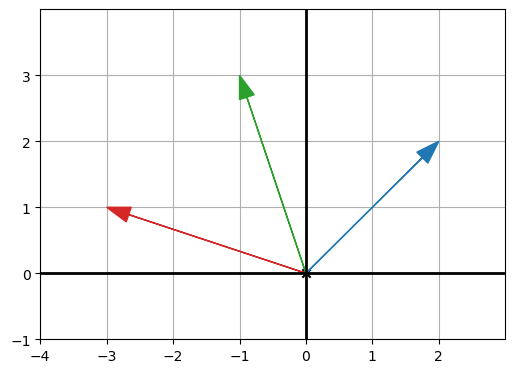

In [2]:
from vec2d.math import subtract
from vec2d.graph import draw, Arrow, Colors

v = (-1, 3)
w = (2, 2)

diff = subtract(v, w)
assert diff == (-3, 1)

draw(
    Arrow(v, color=Colors.GREEN),
    Arrow(w, color=Colors.BLUE),
    Arrow(diff, color=Colors.RED)
)

Note that the vector that results from subtracting $ w $ (in blue) from $ v $ (green) is the same as the vector whose tip is $ v $ and tail is $ w $:

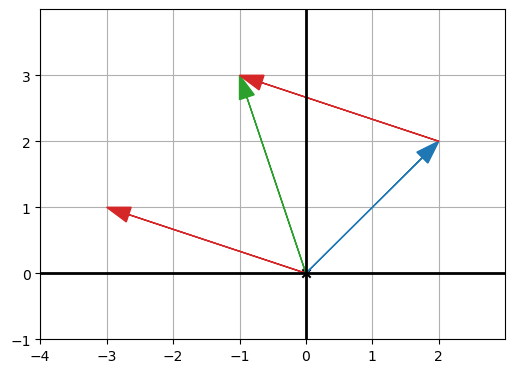

In [3]:
from vec2d.math import subtract
from vec2d.graph import draw, Arrow, Colors

v = (-1, 3)
w = (2, 2)

diff = subtract(v, w)
assert diff == (-3, 1)

draw(
    Arrow(v, color=Colors.GREEN),
    Arrow(w, color=Colors.BLUE),
    Arrow(diff, color=Colors.RED),
    Arrow(v, w, color=Colors.RED)
)

Thus, the geometric representation of the subtraction between two vectors is the distance and direction that we need to travel to go from the second vector (in blue) to the first one (in green).

This is called the *displacement vector*.

This gives us a way to calculate the distance between any two given points:

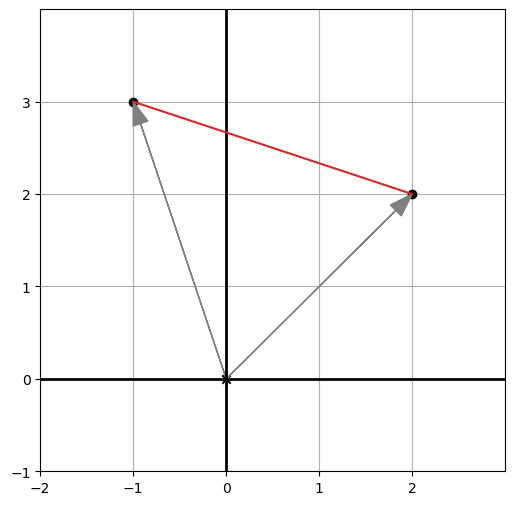

In [6]:
from vec2d.graph import draw, Arrow, Colors, Points, Segment

p1 = (-1, 3)
p2 = (2, 2)

draw(
    Points(p1, p2, color=Colors.BLACK),
    Segment(p1, p2, color=Colors.RED),
    Arrow(p1, color=Colors.GRAY),
    Arrow(p2, color=Colors.GRAY),
)

In [8]:
from vec2d.math import subtract, length

p1 = (-1, 3)
p2 = (2, 2)

length_segment = length(subtract(p1, p2))
print(f"distance from p1 to p2: {length_segment}")

distance from p1 to p2: 3.1622776601683795


Which is the same value we'd get using the Pythagorean theorem, as we know that the side are 1 and 3:

![Vector subtraction](./pics/vector_subtraction.png)

$$
c^2 = a^2 + b^2 \\
c = \sqrt{a^2 + b^2} \\
c = \sqrt{1 + 9} = \sqrt{10} = 3.16...
$$

Note that while the *displacement* is a vector, the *distance* is a scalar.

There are infinite points that have the same distance from a given one.

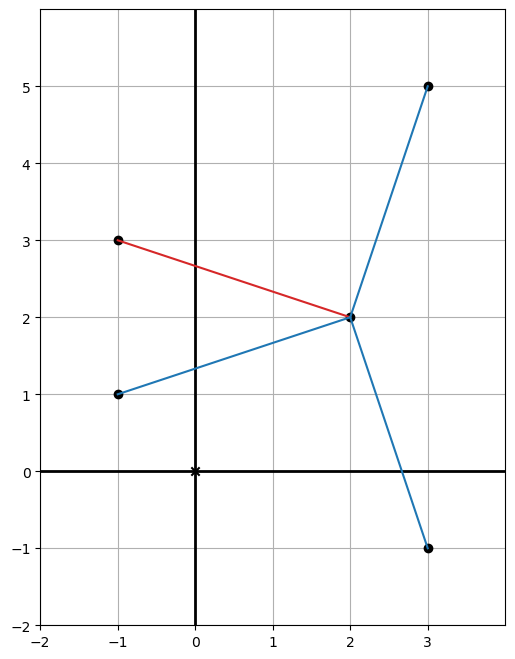

In [13]:
from vec2d.graph import draw, Colors, Points, Segment
from vec2d.math import length, subtract

p1 = (-1, 3)
p2 = (2, 2)

draw(
    Points(p1, p2, (3, 5), (3, -1), (-1, 1), color=Colors.BLACK),
    Segment(p1, p2, color=Colors.RED),
    Segment(p2, (3, 5), color=Colors.BLUE),
    Segment(p2, (3, -1), color=Colors.BLUE),
    Segment(p2, (-1, 1), color=Colors.BLUE),
)

assert length(subtract(p1, p2)) == length(subtract(p2, (3, 5)))
assert length(subtract(p1, p2)) == length(subtract(p2, (3, -1)))
assert length(subtract(p1, p2)) == length(subtract(p2, (-1, 1)))

### Exercise

If the vector $ u = (-2, 0) $, the vector $ v = (1.5, 1.5) $, and the vector $ w = (4, 1) $, what are the results of u + v, v + w, and u + w?

What is the result of $ u + v + w $?

Validate the results using the `vec2d.math`.

$
u + v = (-2, 0) + (1.5, 1.5) = (-0.5, 1.5) \\
v + w = (1.5, 1.5) + (4, 1) = (5.5, 2.5) \\
u + w = (-2, 0) + (4, 1) = (2, 1)
u + v + w = u + (v + w) = (-2, 0) + (5.5, 2.5) = (3.5, 2.5)
$

In [2]:
from vec2d.math import add

u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(f"u + v = {add(u, v)}")
print(f"v + w = {add(v, w)}")
print(f"u + w = {add(u, w)}")
print(f"u + v + w = {add(u, add(v, w))}")

u + v = (-0.5, 1.5)
v + w = (5.5, 2.5)
u + w = (2, 1)
u + v + w = (3.5, 2.5)


### Exercise

You can add any number of vectors together by summing all of their x-coordinates and all of their y-coordinates. For instance, the fourfold sum $ (1, 2) + (2, 4) + (3, 6) + (4, 8) $ has the x component 1 + 2 + 3 + 4 = 10 and y component 2 + 4 + 6 + 8 = 20, so that the vector sum is $ (10, 20) $.

Implement a revised `add` function that takes any number of vectors as arguments.

In [4]:
def add(*v: tuple[int | float]) -> tuple[int | float]:
    return (sum([x for x, _ in v]), sum([y for _, y in v]))

assert add(
    (1, 2),
    (2, 4),
    (3, 6),
    (4, 8)
) == (10, 20)


A variadic `add` has been added to the library:

In [1]:
from vec2d.math import add_mult

assert add_mult(
    (1, 2),
    (2, 4),
    (3, 6),
    (4, 8)
) == (10, 20)

### Exercise

Write a function `translate(translation, vectors)` that takes a translation vector and a list of input vectors and returns the list of the input vectors all translated by the translation vector.

For instance, `translate((1, 1), [(0, 0), (0, 1), (-3, -3)])` should return `[(1, 1), (1, 2), (-2, -2)]`.

In [4]:
def translate(translation: tuple[int | float], vectors: list[tuple[int | float]]) -> tuple[int | float]:
    return [(translation[0] + v[0], translation[1] + v[1]) for v in vectors]

assert translate(
    (1, 1),
    [(0, 0), (0, 1), (-3, -3)]
) == [(1, 1), (1, 2), (-2, -2)]

Or even better, applying the DRY principle:

In [6]:
from vec2d.math import add

def translate(translation: tuple[int | float], vectors: list[tuple[int | float]]) -> tuple[int | float]:
    return [add(translation, v) for v in vectors]

assert translate(
    (1, 1),
    [(0, 0), (0, 1), (-3, -3)]
) == [(1, 1), (1, 2), (-2, -2)]

And this function has been added to our library:

In [1]:
from vec2d.math import translate

assert translate(
    (1, 1),
    [(0, 0), (0, 1), (-3, -3)]
) == [(1, 1), (1, 2), (-2, -2)]

### Exercise

For any pair of vectors, $ v + w $ gives the same results as $ w + v $.

Explain why this is try using the definition of the *vector sum* on coordinates. Also, draw a picture to show it geometrically.

Let's consider:

$
v = (v_x, v_y), \\
w = (w_x, w_y)
$

Then:

$
v + w = (v_x, v_y) + (w_x, w_y) = (v_x + w_x, v_y + w_y)
$

By the commutative rule: $ a + b = b + a $

Therefore:

$
(v_x + w_x, v_y + w_y) = (w_x + v_x, w_y + v_y) = (w_x, w_y) + (v_x, v_y) = w + v
$

Thus,

$$
v + w = w + v
$$


Let's show it geometrically for a couple of vectors:

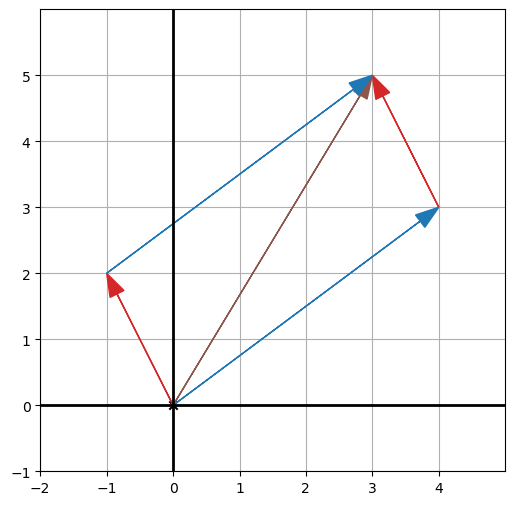

In [4]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import add

v = (4, 3)
w = (-1, 2)

draw(
    Arrow(v, color=Colors.BLUE),
    Arrow(w, color=Colors.RED),
    Arrow(add(v, w), v, color=Colors.RED),
    Arrow(add(v, w), color=Colors.BROWN),
    Arrow(add(w, v), w, color=Colors.BLUE)
)


Note how the brown vector is the diagonal of the triangle with sides the blue and red vector, and the red and blue vector, and yields the same vector sum.

### Exercise

Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.

Let's start by drawing a single dinosaur. And use `min` and `max` to get the:
+ max y coordinate (upper point)
+ min y coordinate (lower point)
+ min x coordinate (leftmost point)
+ max x coordinate (rightmost point)

That will give us the width and length of our dino:
+ `width = (max_x - min_x)`
+ `height = (max_y - min_y)`

Then, we can use those values to *clone* the original dino by translating it:

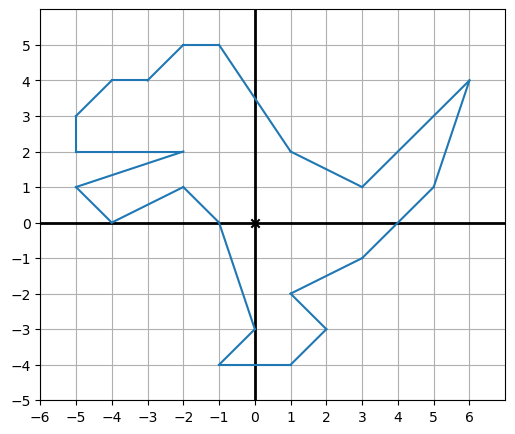

In [5]:
from vec2d.math import add
from vec2d.graph import Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

draw(
    Polygon(*dino_points, color=Colors.BLUE)
)

In [7]:
X = [x for x, _ in dino_points]
Y = [y for _, y in dino_points]
max_x = max(X)
min_x = min(X)
max_y = max(Y)
min_y = min(Y)

dino_width = max_x - min_x
dino_height = max_y - min_y

translation_vector = (dino_width, dino_height)

print(f"min_x={min_x}")
print(f"max_x={max_x}")
print(f"min_y={min_y}")
print(f"max_y={max_y}")
print(translation_vector)



min_x=-5
max_x=6
min_y=-4
max_y=5
(11, 9)


There are multiple ways to do it. One is to have nested loop in which we calculate the clones and append them to a list that is then displayed.

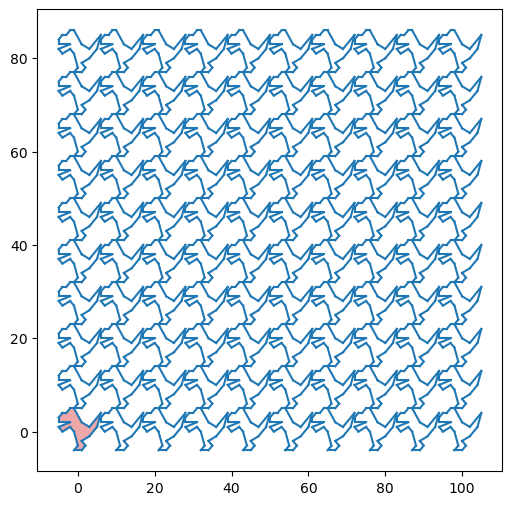

In [16]:
from vec2d.math import add
from vec2d.graph import Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

dino_polygons = []
for i in range(0, 10):
    for j in range(0, 10):
        dino_polygons.append(Polygon(*[add((translation_vector[0] * i, translation_vector[1] * j), v) for v in dino_points], color=Colors.BLUE, fill=Colors.RED if i == 0 and j == 0 else None))

draw(
    *dino_polygons,
    axes=None,
    grid=None,
    origin=None
)

We can also iterate with different limits so that the original dino sits in the middle:

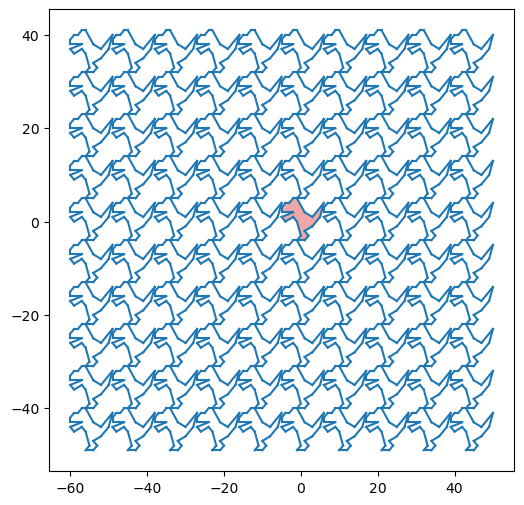

In [17]:
from vec2d.math import add
from vec2d.graph import Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

dino_polygons = []
for i in range(-5, 5):
    for j in range(-5, 5):
        dino_polygons.append(Polygon(*[add((translation_vector[0] * i, translation_vector[1] * j), v) for v in dino_points], color=Colors.BLUE, fill=Colors.RED if i == 0 and j == 0 else None))

draw(
    *dino_polygons,
    axes=None,
    grid=None,
    origin=None
)

We can also add some extra padding:

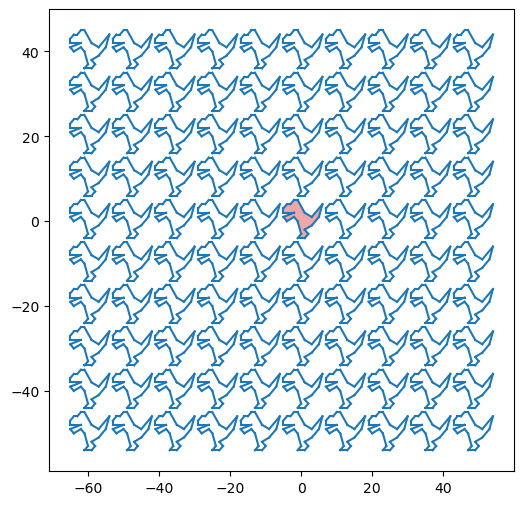

In [19]:
from vec2d.math import add
from vec2d.graph import Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

dino_polygons = []
for i in range(-5, 5):
    for j in range(-5, 5):
        dino_polygons.append(Polygon(*[add(((translation_vector[0] + 1) * i, (translation_vector[1] + 1) * j), v) for v in dino_points], color=Colors.BLUE, fill=Colors.RED if i == 0 and j == 0 else None))

draw(
    *dino_polygons,
    axes=None,
    grid=None,
    origin=None
)

A more *pythonic* approach can be achieved using list comprehensions instead of nested loops.
Using the previously created `translate` function also helps to achieve a more pythonic and clean solution.

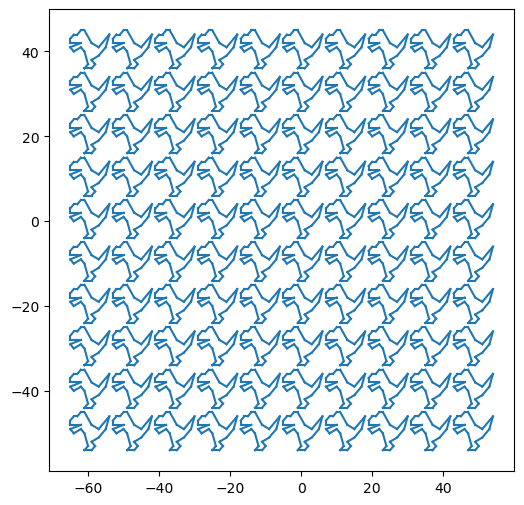

In [24]:
from vec2d.math import translate
from vec2d.graph import Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

translation_vectors = [
    ((translation_vector[0] + 1) * i, (translation_vector[1] + 1) * j)
    for i in range(-5, 5)
    for j in range(-5, 5)
]

dino_polygons = [
    Polygon(*translate(tv, dino_points)) for tv in translation_vectors
]

draw(
    *dino_polygons,
    axes=False,
    origin=False,
    grid=False
)



### Exercise

Which is longer, the x or y component of $ (3, -2) + (1, 1) + (-2, -2) $?

The x component is 2, while the y component is -3. Thus, the y component is longer.

### Exercise

What are the components and lengths of the vectors $ (-6, -6) $ and $ (5, -12) $?

The components of $ (-6, -6) $ are $ (-6, 0) $ and $ (0, -6) $. The length is $ \sqrt{6^2 + 6^2} = \sqrt{72} = 8.49... $.

The components of $ (5, -12) $ are $ (5, 0) $ and $ (0, -12) $. The length is $ \sqrt{5^2 + 12^2} = \sqrt{169} = 13 $.

### Exercise

Suppose I have a vector $ v $ that has a length of 6 and an x component $ (1, 0) $. What are the possible coordinates of $ v $?

If length(v) = 6, and the vector is (1, y), we can establish the following equation:

$
1^2 + y^2 = 6^2 \\
y^2 = 35 \Rightarrow y = \pm \sqrt{35} \approx 5.916
$

Thus, the vector is $ (1, 5.916) $.

### Exercise

What vector in the `dino_vectors` list has the longest length? Calculate using Python.

In [26]:
from vec2d.math import length

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]
lengths = [length(v) for v in dino_points]
max_len = max(lengths)
max_len_index = lengths.index(max_len)

print(f"Longest vector: {dino_points[max_len_index]}")

Longest vector: (6, 4)


A more *pythonic* way to solve this exercise consists in using the `key` argument of the `max` function which let us pass a function that will be used to establish the max value.

This is by far more efficient and cleaner.

In [27]:
from vec2d.math import length

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]
longest_v = max(dino_points, key=length)

print(f"Longest vector: {longest_v}")

Longest vector: (6, 4)


### Exercise

Suppose a vector $ w $ has the coordinates $ (\sqrt{2}, \sqrt{3}) $. What are the approximate coordinates of the scalar multiple $ \pi \cdot w $?

Draw the original and the new vector using the graph library.

The approximate value for $ \sqrt{2} = 1.41 $ and $ \sqrt{3} = 1.73 $.

Thus, the approximate value for $ \pi \cdot w $ is $ (4.42, 5.43) $.

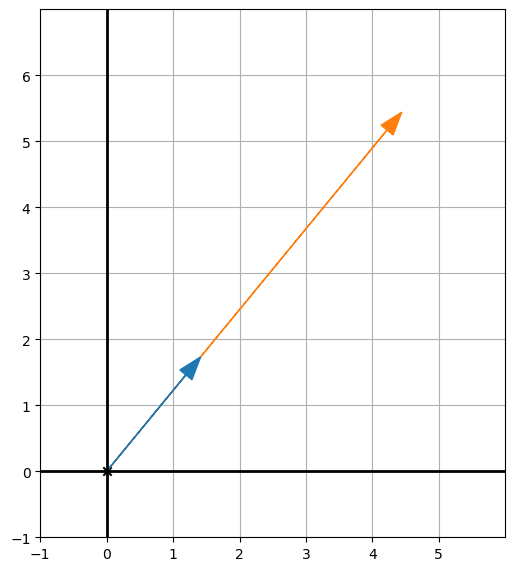

In [29]:
from vec2d.math import scalar_product
from vec2d.graph import Arrow, Colors, draw
from math import sqrt, pi

w = (sqrt(2), sqrt(3))

draw(
    Arrow(scalar_product(w, pi), color=Colors.ORANGE),
    Arrow(w, color=Colors.BLUE),
)


### Exercise

Write a Python function `scale(s, v)` that multiplies the input vector v by the input scalar s.

In [2]:
def scale(s: [int|float], v: tuple[int, int]) -> tuple[int, int]:
    return (s * v[0], s * v[1])

print(scale(3, (5, 2)))


(15, 6)


### Exercise

Convince yourself algebraically that scaling the coordinates by a factor also scales the length of the vector by the same factor. Suppose that a vector of length $ c $ has the coordinates $ (a, b) $.

Show that for any non-negative real number $ s $, the length of $ (s \cdot a, s \cdot b) $ is $ s \cdot c $.

Let  $ v = (a, b) $, then $ length(v) = \sqrt{a^2 + b^2} $.

Let $ s $ be a non-negative real number:

$
length(s \cdot v) = length((s \cdot a, s \cdot b)) = \\
= \sqrt{(s \cdot a)^2 + (s \cdot b)^2} = \\
= \sqrt{s^2 \cdot a^2 + s^2 \cdot b^2} = \\
= \sqrt{s^2} \cdot \sqrt{a^2 + b^2} = \\
= s \cdot length(v)
$

Thus, $ length(s \cdot v) = s \cdot length(v) $, and therefore, scaling the coordinates of a vector by a factor also scales the length of the vector by the same factor.

Note that in Math, we typically denote the length of a vector using: $ | v | $. Then, we can write:

$
|s \cdot v| = s \cdot |v |
$

### Exercise

Suppose u = (-1, 1), and v = (1, 1), and suppose r and s are real numbers.

Specifically, let's assume $ -3 < r < 3 $, and $ -1 < s < 1 $. Where are the possible points on the plane where the vector $ r \cdot u + s \cdot v $ could end up.

Note the precedence for vector arithmetic is the same as for numbers &mdash; multiplication is performed first, then addition, unless parentheses are used.

It'll be a rectangle, tilted 45° counter-clockwise. This is derived from applying the tip-to-tail approach.

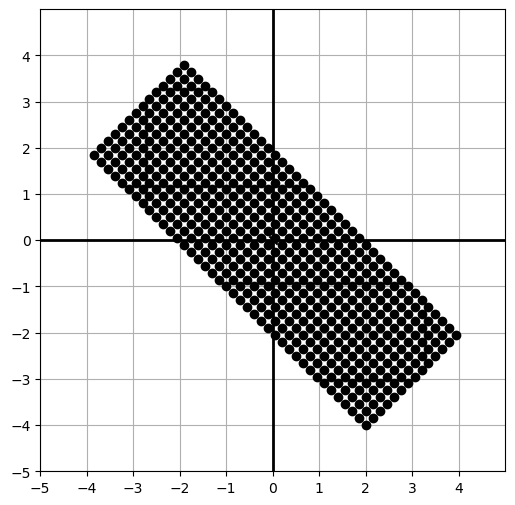

In [12]:
import numpy as np
from vec2d.graph import Points, draw
from vec2d.math import add, scalar_product

step = 0.15
R = np.arange(-3, 3, step)
S = np.arange(-1, 1, step)

u = (-1, 1)
v = (1, 1)
vectors = [
    add(scalar_product(u, r), scalar_product(v, s))
    for r in R
    for s in S
]

points = Points(*vectors)
draw(points)


Note that we can get to a similar implementation without using NumPy:

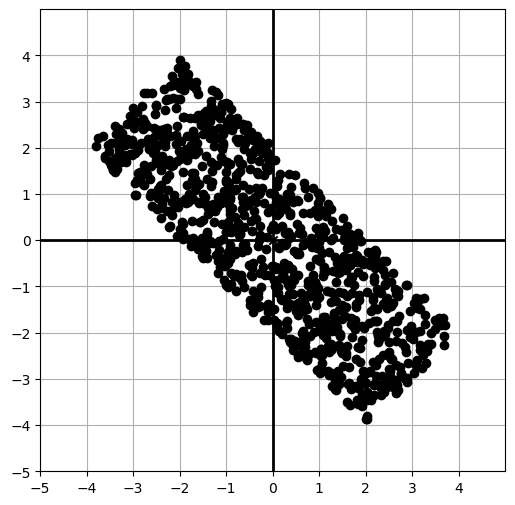

In [16]:
from random import uniform
from vec2d.graph import Points, draw
from vec2d.math import add, scalar_product

def random_r():
    return uniform(-3, 3)

def random_s():
    return uniform(-1, 1)

u = (-1, 1)
v = (1, 1)

num_samples = 1000
vectors = [
    add(
        scalar_product(u, random_r()),
        scalar_product(v, random_s())
    ) for _ in range(0, num_samples)
]


draw(Points(*vectors))

See how the NumPy based solution renders more uniform results.

### Exercise

Show algebraically why a vector and its opposite have the same length.

Let $ v = (a, b) $. Then, the opposite of $ v $, $ -v = -1 \cdot (a, b) = (-a, -b) $.

Then, 
$
|v| = \sqrt{a^2 + b^2} = \sqrt{(-a)^2 + (-b)^2} = \\
= |-v|
$

### Exercise

Suppose $ u $ is any 2D vector. What are the coordinates of $ u + -u $.

Let $ u = (a, b) $.

Then,

$
u + -u = (a, b) + (-a, -b) = (0, 0)
$

Using the tip-to-tail method for the addition this means that if you follow any vector and its opposite you end up in the origin of coordinates.

### Exercise

For vectors $ u = (-2, 0) $, $ v = (1.5, 1.5) $, and $ w = (4, 1) $. What are the results of the vector substractions $ v - w $, $ u - v $, and $ w - v $?

$
v - w = (-2.5, 0.5) \\
u - v = (-3.5, -1.5) \\
w - v = (2.5, -0.5)
$

Let's do that with Python and also geometrically:

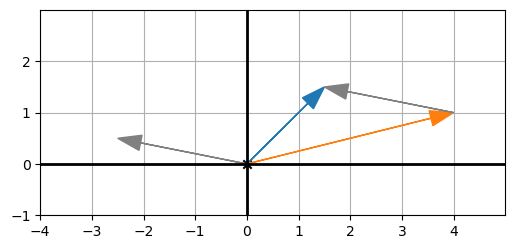

In [3]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import subtract

v = (1.5, 1.5)
w = (4, 1)

draw(
    Arrow(v, color=Colors.BLUE),
    Arrow(w, color=Colors.ORANGE),
    Arrow((-2.5, 0.5), color=Colors.GRAY),
    Arrow(v, w, color=Colors.GRAY)
)

assert subtract(v, w) == (-2.5, 0.5)

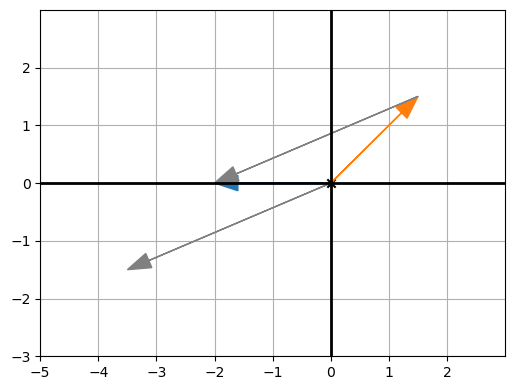

In [5]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import subtract

u = (-2, 0)
v = (1.5, 1.5)


draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow((-3.5, -1.5), color=Colors.GRAY),
    Arrow(u, v, color=Colors.GRAY)
)

assert subtract(u, v) == (-3.5, -1.5)

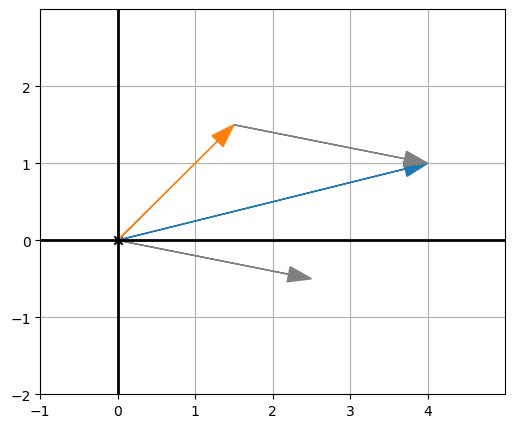

In [7]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import subtract

w = (4, 1)
v = (1.5, 1.5)

draw(
    Arrow(w, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow((2.5, -0.5), color=Colors.GRAY),
    Arrow(w, v, color=Colors.GRAY)
)

assert subtract(w, v) == (2.5, -0.5)

Obviously, $ v - w $ is the opposite of $ w - v $.

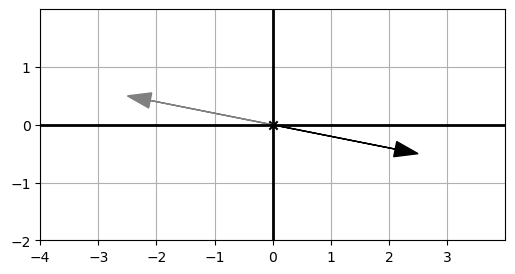

In [8]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import subtract

w = (4, 1)
v = (1.5, 1.5)

draw(
    Arrow(subtract(w, v), color=Colors.BLACK),
    Arrow(subtract(v, w), color=Colors.GRAY)
)


### Exercise

Write a Python function `distance(v1, v2)` that returns the distance (scalar) between two input vectors.

Write another function, `perimeter(vectors)` that takes a list of vectors as an argument and returns the sum of distances from each vector to the next, including the distance from the last vector to the first. Use it to calculate the perimeter of a square of side 2, and the perimeter of the dinosaur.

Let's assume we don't have at hand our vec2d lib first, then, we'll rely on vec2d.

In [9]:
from math import sqrt

def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

def distance(v1, v2):
    displacement_v = subtract(v1, v2)
    return sqrt(displacement_v[0] ** 2 + displacement_v[1] ** 2)


assert distance((1, 1), (2, 1)) == 1

In [13]:
from vec2d.math import subtract, length

def distance(v1, v2):
    return length(subtract(v1, v2))

assert distance((1, 1), (2, 1)) == 1

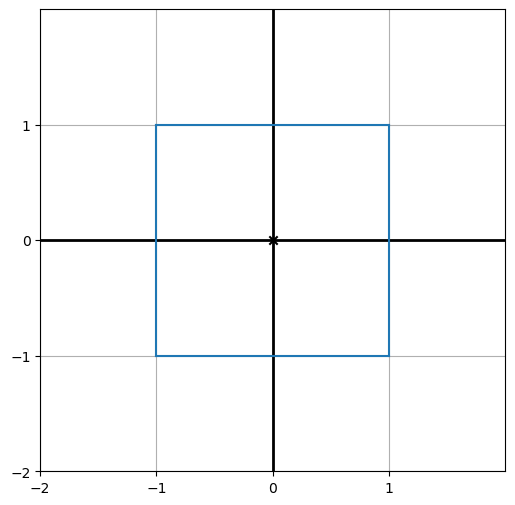

8.0


In [19]:
from vec2d.graph import draw, Colors, Polygon

def perimeter(vectors):
    result = 0
    for i in range(0, len(vectors)):
        result += distance(vectors[(i + 1) % len(vectors)], vectors[i])
    return result

square_points = [
    (1, 1),
    (-1, 1),
    (-1, -1),
    (1, -1)
]

draw(
    Polygon(*square_points, color=Colors.BLUE)
)

assert perimeter(square_points) == 8



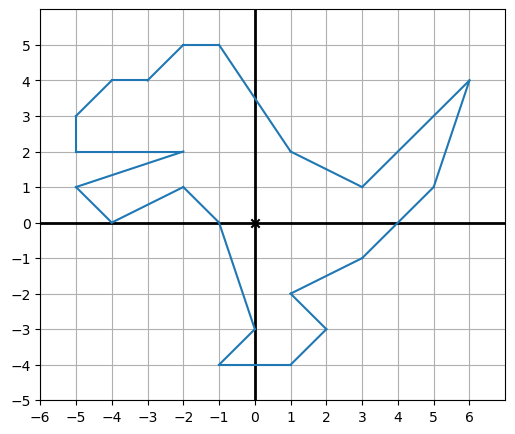

In [27]:
from vec2d.graph import draw, Colors, Polygon


def perimeter(vectors):
    result = 0
    for i in range(0, len(vectors)):
        result += distance(vectors[(i + 1) % len(vectors)], vectors[i])
    return result

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

draw(
    Polygon(*dino_points, color=Colors.BLUE)
)

assert round(perimeter(dino_points), 3) == 44.771


We can define those functions in our library and check:

In [3]:
from vec2d.math import displacement, distance, perimeter

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

assert displacement((1, 1), (2, 1)) == (-1, 0)
assert distance((1, 1), (2, 1)) == 1
assert round(perimeter(dino_points), 3) == 44.771

In particular, the perimeter function has been implemented in the library using a more Pythonic way using list comprehensions:

In [5]:
from vec2d.math import distance

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i + 1) % len(vectors)]) for i in range(0, len(vectors))]
    return sum(distances)

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]
assert round(perimeter(dino_points), 3) == 44.771

### Exercise

Let $ u $ be the vector $ (1, -1) $. Suppose there is another vector $ v $ with positive integer coordinates $ (n, m) $ such that $ n > m $ and has a distance of 13 from $ u $. What is the displacement from $ u $ to $ v $?

Hint: use a brute-force approach

Let $ u = (1, -1) $, $ v = (n, m) $ with $ n > m $

We know that $ | u - v | = 13 $.

We also know that $n > m $ with $ n $ and $ m $ positive integers.

We only need to search for the integer pairs $ (n, m) $ where $ n $ is within 13 units of 1 and $ m $ is within 13 units of -1.

In [6]:
from vec2d.math import distance

for n in range(-12, 15):
    for m in range(-14, 13):
        if distance((n, m), (1, -1)) == 13 and n > m > 0:
            print(f"a solution was found: ({n}, {m})")

a solution was found: (13, 4)


## Angles and trigonometry in the plane

So far, we've used x and y coordinates to uniquely identify a vector. Similarly, we could use two pieces of information, namely, the length of the vector and its direction, to uniquely identify any vector.

These numbers are called **polar coordinates**, and they're just as good as the **Cartesian coordinates** we've used thus far.

Sometimes, it'll be easier to use the *Cartesian coordinates*, like when we're adding vectors; some other times, it'll make more sense to use the *polar coordinates*, for instance, when we're rotating a vector.

### From angles (polar coordinates) to components (Cartesian coordinates)

Let's consider we have a vector defined by its polar coordinates $ (3, 116.57°) $. If we had to draw that manually, we'd need to set a protractor in the origin of coordinates, locate the angle, then draw a line whose length is 3 units.

That would give us the vector, and we could project the vector into the x- and y- axis to get its coordinates which will be approximately $ (-1.34, 2.68) $.

![Polar to Cartesian Coords](pics/polar-cartesian-coords.png)

Note that the 116.57° angle has some interesting property. Vectors that line along the line defined by that angle have their y- coordinates being -2 times their y coordinates.

While the the angle has been chosen because it gives us that beautiful whole number ratio of -2: (-1, 2), (-1.34, 2.68), (-2, -4)... one thing will be similar with all the angles:
> every angle will give us a constant ratio between the y- and x- coordinate.

For example, 45° will give us a ratio of 1 for all the vectors along that line, and 200° will give us a ratio of -0.36.

This ratio between the value of the y- and x- coordinate is called the **tangent** of the angle, and the tangent function is written as `tan`.

We already have calculated a few points for that function:

$
tan(37°) \approx \frac{3}{4} \\
tan(116.57°) \approx -2 \\
tan(45°) = 1 \\
tan(200°) \approx 0.36
$

The *tangent* function seems to be related to our problem of finding the Cartesian coordinates for a vector given its polar coordinates, as it provides the ratio $ \displaystyle \frac{y}{x} $, with $ x $ and $ y $ being the vector coordinates.

So, the *tangent* gives us the vertical distance covered divided by the horizontal distance.

![Distances and angles](pics/distances-and-angles.png)

Another two functions are required to get not only the ratio, but the actual cordinates: the **sine** and the **cosine** function which will give us the vertical and horizontal distance covered relateive to the overall distance.

In summary:

$$
tan(angle) = \frac{vertical}{horizontal}
$$

$$
sin(angle) = \frac{vertical}{distance}
$$

$$
cos(angle) = \frac{horizontal}{distance}
$$


As a result, the general strategy for converting any given vector from its polar coordinates $ (r, \theta) $ to its Cartesian coordinates $ (x, y) $, will be:

![Polar to Cartesian](pics/polar-to-cartesian-formula.png)

The formula is easily derived from the definition of the *sine* and *cosine* functions.

#### Radians and Degrees in Python

Built-in trigonometry functions such as *sine*, *cosine*, and *tangent* do not use degrees. Instead, they use another units called **radians**.

The conversion factor is: $ 1 \text{ radian } \approx 57.296 ° $, but it is most common to refer to these other conversions:

$
\pi \text{ radians } = 180 ° \\
$

$
2 \pi \text{ radians } = 360 ° \\
$

That is, an angle $ \theta =  \pi $ radians will take half of the circumference, and $ \theta =  2 \pi $ radians will take around the whole circumference.

Note that $ 2 \pi $ happens to be the *perimeter*/*length* of a circle whose radius is 1. Thus, the *radian* term.

![Radians: conversion](pics/radians_conversion.png)

At this point we can rely on Python's `math` library to write a conversion function `to_cartesian`.
We can also define a `to_radians` function to help with the conversion when we're dealing with angles in degrees:

In [1]:
from math import sin, cos, pi

def to_cartesian(polar_vector: tuple[float, float]) -> tuple[float, float]:
    """Returns the Cartesian coordinates of a vector given its polar coordinates (d, θ).
    The angle is expected in radians.
    """
    length, angle = polar_vector
    return (length * cos(angle), length * sin(angle))

def to_radians(angle_deg: float) -> float:
    """Returns the radians value for an angle """
    return angle_deg * pi / 180

print(to_cartesian((5, to_radians(37))))

(3.993177550236464, 3.0090751157602416)


Those functions have been added to our library for convenience:

In [3]:
from vec2d.math import to_cartesian, to_radians

print(to_cartesian((1, to_radians(45))))

(0.7071067811865476, 0.7071067811865475)


### From components (Cartesian coordinates) to angles (polar coordinates)

Consider the situation in which we need to find the *polar coordinates* of the vector whose Cartesian coordinates are $ (-2, 3) $.

From the previous sections, we know that the vector length $ r $ will be $ \sqrt{13} $. Thus, we only need to find the angle $ \theta $.

![Cartesian to polar](pics/cartesian-to-polar.png)

We can state some facts about the angle we're looking for.

Its tangent, sin, and cos are:

$
tan(\theta) = - \frac{3}{2}
$

$
sin(\theta) = \frac{3}{\sqrt{13}}
$

$
cos(\theta) = \frac{-2}{\sqrt{13}}
$

While we can try and approximate those values, there are Math functions that just do that: inverse trigonometric functions that give you the angle, given the value of $ tan $, $ sin $, or $ cos $.

In [5]:
from math import asin, acos, atan, sqrt
from vec2d.math import to_degrees

theta1 = atan(-3 / 2)
print (theta1, to_degrees(theta1))

theta2 = asin(3 / sqrt(13))
print (theta2, to_degrees(theta2))

theta3 = acos(-2 / sqrt(13))
print (theta3, to_degrees(theta3))

-0.982793723247329 -56.309932474020215
0.9827937232473292 56.30993247402022
2.1587989303424644 123.6900675259798


This is confusing, because the three functions give us different angle values:

In [3]:
from math import sin, cos, tan

angle1 = -0.982793723247329
angle2 = 0.9827937232473292
angle3 = 2.1587989303424644

print(tan(angle3))

-1.4999999999999993


And it seems that the arccosine is the one that gives us the correct angle value of 2.16 ($ \approx 123.70° $).

However, this is only by happenstance &mdash; we'll have to make sure the sine and cosine agree with our expectation:

In [7]:
from math import sin, cos, sqrt

angle = 2.1587989303424644

print(cos(angle))
print(-2 / sqrt(13))

print(sin(angle))
print(3 / sqrt(13))

-0.5547001962252293
-0.5547001962252291
0.8320502943378436
0.8320502943378437


Thus, it seems that 2.1587989303424644 is the correct angle.

| NOTE: |
| :---- |
| Inverse trigonometric functions are tricky: multiple different inputs can produce the same output and as a result, an output can't be traced back to a unique input. |

Using Python, we can use the `atan2` function to get the value for the angle without relying on manual validation.

This function takes the Cartesian coordinates of a point in reverse order and provides the angle:

In [8]:
from math import atan2
from vec2d.math import to_degrees

angle = atan2(3, -2)
print(f"angle: {angle} radians, {to_degrees(angle)}°")

angle: 2.158798930342464 radians, 123.69006752597979°


We now have a way of implementing `to_polar` in a secure manner:

In [21]:
from vec2d.math import length
from math import atan2, pi, sqrt

def to_polar(v):
    x, y = v
    return (length(v), atan2(y, x))

assert to_polar((1, 0)) == (1, 0)
assert to_polar((0, 1)) == (1, pi / 2)
assert to_polar((-1, 0)) == (1, pi)
assert to_polar((0, -1)) == (1, -pi / 2)

assert to_polar((-2, 3)) == (sqrt(13), 2.158798930342464)


Note that we had to use `-pi / 2` to refer to the `3 * pi / 2` angle.

The function is also included in our library:

In [1]:
from vec2d.math import to_polar
from math import pi, sqrt

assert to_polar((1, 0)) == (1, 0)
assert to_polar((0, 1)) == (1, pi / 2)
assert to_polar((-1, 0)) == (1, pi)
assert to_polar((0, -1)) == (1, -pi / 2)

assert to_polar((-2, 3)) == (sqrt(13), 2.158798930342464)

assert to_polar((0, -1), positive_angle=True) == (1, 3 * pi / 2)


### Exercise

Confirm that the vector given by Cartesian coordinates `(1.34, 2.68)` has a length of approximately 3 as expected.

In [4]:
from vec2d.math import length

length((1.34, 2.68))

2.9963310898497184

### Exercise

The following picture shows a line that makes a 22° angle in the counterclockwise direction from the positive x- axis.

Looking only at the figure, what is the approximate value of $ tan(22°) $?
Use Python to verify the answer.

![Line at 22](pics/line-at-22-degrees.png)

The *tangent* is defined as the relation between the vertical and horizontal distance for a vector:

$
tan(\theta) = \frac{vertical}{horizontal}
$

Looking at the line, we see that it crosses through $ (5, 2) $ and $ (10, 4) $. We can use any of those points to calculate the tangent:

$
tan(22°) = \frac{10}{4} = 0.4
$

### Exercise

What are the x and y components of a vector with length 15 pointing at a 37° angle?
Try to reason using the value of `sin(37°)` and `cos(37°)` instead of the `vec2d` library.

In [4]:
from math import sin, cos, pi

angle_deg = 37
angle_rad = 37 * pi / 180
print(f"sin(37°)={sin(angle_rad)}")
print(f"cos(37°)={cos(angle_rad)}")

sin(37°)=0.6018150231520483
cos(37°)=0.7986355100472928


The sine is defined as:

$
sin(\theta) = \frac{vertical}{distance}
$

Thus, if $ sin(37°) \approx 0.60 = \frac{3}{5} $, it means that, for instance, for 15 units of distance, the y- coordinate would be 9.

Similarly:

$
cos(\theta) = \frac{horizontal}{distance}
$

Thus, if $ cos(37°) \approx 0.80 \approx \frac{4}{5} $, it means that, for instance, for 15 units of distance, the x- coordinate would be 12.

As a result, the x, y components of a vector $ (15, 37°) $ will be approximately $ (12, 9) $.

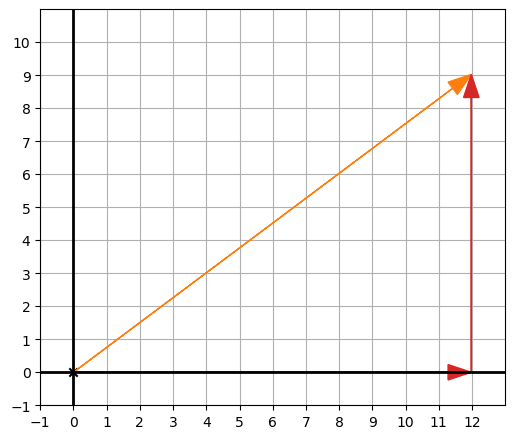

In [6]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import to_cartesian, to_radians

v_polar = (15, to_radians(37))
v_cartesian = to_cartesian(v_polar)

draw(
    Arrow(v_cartesian, color=Colors.ORANGE),
    Arrow((v_cartesian[0], 0)),
    Arrow(v_cartesian, (v_cartesian[0], 0))
)

### Exercise

Suppose that I travel 8.5 units from the origin at an angle of 125°, measured counterclockwise from the positive x- axis. Given that $ sin(125°) = 0.819 $ and $ cos(125°) = -0.574 $, what are my final coordinates.

Draw a picture to show the angle and path traveled.

We know that:

$
sin(\theta) = \frac{vertical}{distance}
$

and

$
cos(\theta) = \frac{horizontal}{distance}
$

Thus, $ sin(125°) = 0.819 $, meaning that $ y = 0.819 \cdot 8.5 \approx 6.96 $.

Similarly, $ cos(125°) = -0.574 $, meaning that $ x = -0.574 \cdot 8.5 \approx -4.88 $.

Therefore, the Cartesian coordinates are $ (-4.88, 6.96) $.

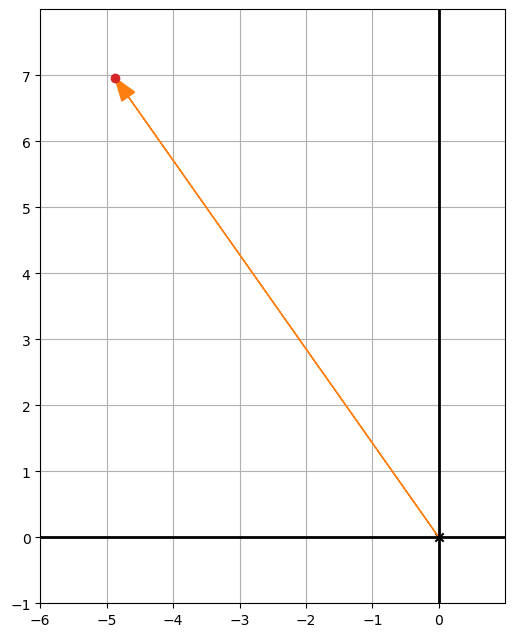

In [9]:
from vec2d.math import to_radians, to_cartesian
from vec2d.graph import Arrow, Colors, Points


calculated_point = (-4.88, 6.96)
v_cartesian = to_cartesian((8.5, to_radians(125)))
draw(
    Arrow(v_cartesian, color=Colors.ORANGE),
    Points(calculated_point, color=Colors.RED)
)


### Exercise

What are the sine and cosine of 0°, 90°, 180°, 270°?

We just need to layout the geometric definition of sine and cosine:

$
sin(\theta) = \frac{vertical}{distance}
$

and 

$
cos(\theta) = \frac{horizontal}{distance}
$

Therefore:

$ sin(0°) = 0 $, as the vertical distance will always be zero for any vector whose angle is 0°, and therefore, the ratio will be zero.

$ cos(0°) = 1 $, as the horizontal distance will always be the same as the total distance for any vector whose angle is 0°, and thefore, the ratio will be one.

$ sin(90°) = 1 $, as the vertical distance will always be the same as the total distance for any vector whose angle is 90°, and therefore, the ratio will be one.

$ cos(90°) = 0 $, as the horizontal distance will always be zero for any vector whose angle is 90°, and thefore, the ratio will be zero.

Similarly:

$ sin(180°) = 0 $

$ cos(180°) = -1 $

$ sin(270°) = -1 $

$ cos(270°) = 0 $

Therefore

|     | 0° | 90° | 180° | 270° |
|----:|---:|----:|-----:|-----:|
| sin | 0  | 1   | 0    | -1   | 
| cos | 1  | 0   | -1   | 0    |

### Exercise

The following diagram gives some exact measurements for a right triangle:

![Triangle](pics/triangle.png)

First, confirm that these lengths are valid for a right triangle because they satisfy the Pythagorean theorem. Then, calculate the values of $ sin(30°) $, $ cos(30°) $, and $ tan(30°) $ to three decimal places using the measurements in the diagram.

Let's first confirm that it is a right triangle:

For a right triangle, the Pythagorean theorem tells you that:
$
d^2 = a^2 + b^2 \\
1^2 = (\frac{\sqrt{3}}{2})^2 + (\frac{1}{2})^2 = \\
\frac{3}{4} + \frac{1}{4} = 1
$

Thus, the given lengths satisfy the Pythagorean theorem.

Then, remembering the geometric definition of $ sin $, $ cos $, and $ tan $:

$
sin(\theta) = \frac{vertical}{distance}
$

$
cos(\theta) = \frac{horizontal}{distance}
$

$
tan(\theta) = \frac{vertical}{horizontal}
$

Then:

$
sin(30°) = \frac{\frac{1}{2}}{1} = \frac{1}{2}
$

$
cos(30°) = \frac{\frac{\sqrt{3}}{2}}{1} = \frac{\sqrt{3}}{2} \approx \frac{1.73}{2} \approx 0.866
$

$
tan(30°) = \frac{\frac{1}{2}}{\frac{\sqrt{3}}{2}} = \frac{1}{\sqrt{3}} \approx \frac{1}{1.73} = 0.577
$

### Exercise

Looking at the triangle from the previous exercise from a different perspective, calculate the values of $ sin(60°) $, $ cos(60°) $, and tan(60°) to three decimal places.

![Triangle](pics/triangle.png)

Recalling the geometric definition of sine, cosine, and tangent:

$
sin(\theta) = \frac{vertical}{distance}
$

$
cos(\theta) = \frac{horizontal}{distance}
$

$
tan(\theta) = \frac{vertical}{horizontal}
$

In our example, looking from the 60° angle:

$
sin(60°) = \frac{\frac{\sqrt{3}}{2}}{1} = \frac{\sqrt{3}}{2} \approx 0.866
$

$
cos(60°) = \frac{\frac{1}{2}}{1} = 0.5
$

$
tan(60°) = \frac{\frac{\sqrt{3}}{2}}{\frac{1}{2}} \approx 1.732
$

### Exercise

The cosine of 50° is 0.643. What is $ sin(50°) $ and what is $ tan(50°) $?

Draw a picture to calculate the answer.

Let's create a sketch with our library:

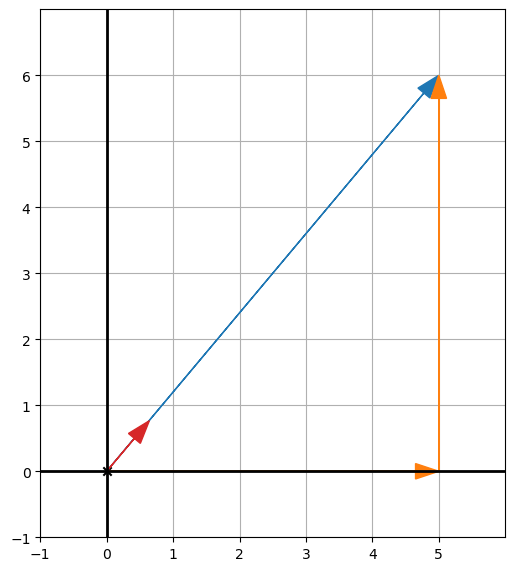

In [6]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import to_cartesian, to_radians


v = (10, to_radians(50))
draw(
    Arrow((5, 6), color=Colors.BLUE),
    Arrow((5, 0), color=Colors.ORANGE),
    Arrow((5, 6), (5, 0), color=Colors.ORANGE),
    Arrow(to_cartesian((1, to_radians(50))), color=Colors.RED),
)

Thus we have:

![Triangle](pics/triangle_50_deg.png)

And recalling the geometric definition of sine, cosine, and tan:

$
sin(\theta) = \frac{vertical}{distance}
$

$
cos(\theta) = \frac{horizontal}{distance}
$

$
tan(\theta) = \frac{vertical}{horizontal}
$

Therefore, if we know:

$
cos(50°) = \frac{h}{d} = 0.643
$

$
sin(50°) = \frac{v}{d}
$

$
tan(50°) = \frac{v}{h}
$

If we have a look at the red arrow, we see that there's a vector with length 1 along the 50° line.

For that vector, d = 1, and thus:

$
cos(50°) = \frac{h}{1} = 0.643  \Rightarrow h = 0.643
$

And because the triangle is a right triangle, we can apply the Pythagorean theoream:

$
v^2 + h^2 = d^2 \\
v^2 + (0.643)^2 = 1^2 \\
v = \sqrt(1 - (0.643)^2) = \sqrt(1 - 0.413) = 0.766
$

And thus:

$
sin(50°) = \frac{v}{d} = 0.766
$

$
tan(50°) = \frac{v}{h} = \frac{0.766}{0.643} = 1.191
$

Note the following:

As 

$
v^2 + h^2 = d^2
$

with $ d = 1 $, $ sin(\theta) = v $ and $ cos(\theta) = h $, and therefore:

$
sin(\theta)^2 + cos(\theta)^2 = 1
$

### Exercise

What is 116.57° in radians? Use Python to compute the tangent of this angle and confirm that it is close to -2.

Let's do it manually first:

$
116.57° \cdot \frac{\pi \text{ radians}}{180°} \approx \frac{366.263}{180} \text{radians} = 2.035 \text{radians}
$

Now using our Python libraries

In [7]:
from math import tan
from vec2d.math import to_radians

angle_deg = 116.57
angle_rad = to_radians(angle_deg)
print(f"angle={angle_rad} radians")

print(f"tan(116.57°)={tan(angle_rad)}")

angle=2.03453030904979 radians
tan(116.57°)=-1.9995682083189954


### Exercise

Locate the angle $ 10 \pi / 6 $. Do you expect the values of $ cos(10 \pi / 6) $ and $ sin(10 \pi / 6) $ to be positive or negative?

Use python to calculate their values and confirm.

The angle can be simplified:

$ 
\frac{10 \cdot \pi}{6} = \frac{5 \cdot pi}{3}
$

Thus, the angle is $ \pi / 3 $ shy of $ 2 pi $ (-30°)

As a result:
+ vertical component will be negative
+ horizontal component will be positive

And as a result:

$
sin(10 \pi / 6) < 0 \\
cos(10 \pi / 6) > 0
$

In [8]:
from math import sin, cos, pi

angle = 10 * pi / 6

print(f"sin(angle)={sin(angle)}")
print(f"cos(angle)={cos(angle)}")

sin(angle)=-0.8660254037844386
cos(angle)=0.5000000000000001


### Exercise

The following list comprehension creates 1,000 points in polar coordinates:

```python
[(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0, 1_000)]
```

Convert these to Cartesian coordinates and connect them in a closed loop with line segments to draw a picture.

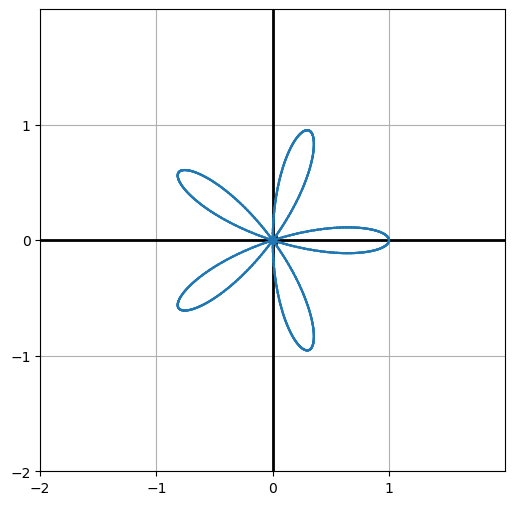

In [10]:
from vec2d.math import to_cartesian
from vec2d.graph import draw, Polygon

points_polar = [(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0, 1_000)]
points = [to_cartesian(p) for p in points_polar]

draw(
    Polygon(*points)
)

### Exercise

Polar coordinates gives us an easy way to draw circles. Draw 3 concentric circumferences of radius 1, 5, 10 in colors blue, orange, and red.

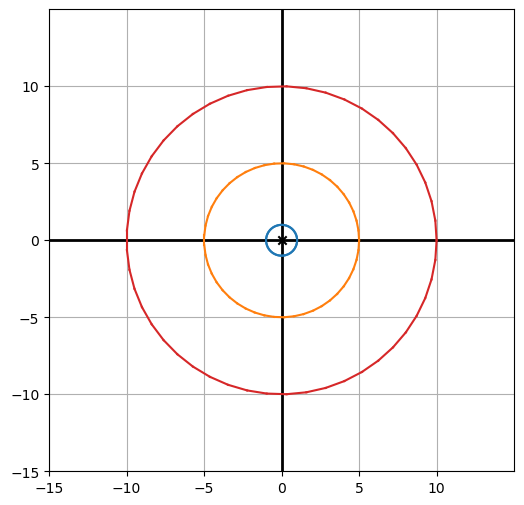

In [24]:
from math import pi
import numpy as np
from vec2d.math import to_cartesian
from vec2d.graph import draw, Polygon, Colors


angles = np.linspace(0, 2 * pi, 50)

def circumference_points(r):
    return [to_cartesian((r, angle)) for angle in angles]


draw(
    Polygon(*circumference_points(1), color=Colors.BLUE),
    Polygon(*circumference_points(5), color=Colors.ORANGE),
    Polygon(*circumference_points(10), color=Colors.RED),
    grid=(5, 5)
)

### Exercise

Find the angle to get to the point $ (-2, 3) $ by "guess-and-check".

To get to the point $ (-2, 3) $ we need an angle between 90° and 180°.

We also know that the length of such vector is $ \sqrt(13) $ which is 3.606.

Additionally, from the geometric representation of sine, cosine, and tangent we know that:

$
sin(\theta) = \frac{3}{3.606} = 0.832
$

$
cos(\theta) = \frac{-2}{3.606} = -0.555
$

$
tan(\theta) = \frac{3}{-2} = -1.5
$

We also know that in the range 90° and 180° the sine values decreases and the cosine increases. Thus, we should try closer to 90°.


In [41]:
from math import pi, sin
from vec2d.math import to_radians

angle = 90 + 45
print(f"sin({angle})={sin(to_radians(angle))}")

angle = 90 + 45 / 2
print(f"sin({angle})={sin(to_radians(angle))}")

angle = 125
print(f"sin({angle})={sin(to_radians(angle))}")

angle = 123.7
print(f"sin({angle})={sin(to_radians(angle))}")

print("angle in radians:", to_radians(angle))


sin(135)=0.7071067811865476
sin(112.5)=0.9238795325112867
sin(125)=0.819152044288992
sin(123.7)=0.8319541221304825
angle in radians: 2.158972284716986


### Exercise

Find another point in the plane with the same tangent -3/2. Use Python's implementation of the arctangent function to find the value of this angle.

We know we need to be careful when using the inverse trigonometric functions, so let's think first what is our expectation with respect to the angle we're looking for.

$
tan(\theta) = \frac{vertical}{horizontal} = - \frac{3}{2}
$

This means that either the vertical or the horizontal value are negative, but not both.

Thus, we expect to find an angle either in the range:
+ 90°, 180°
+ 270°, 360°


In [44]:
from math import atan
from vec2d.math import to_degrees

angle = atan(-3/2)
print(f"angle(rad)={angle}, angle(°)={to_degrees(angle)}")

angle(rad)=-0.982793723247329, angle(°)=-56.309932474020215


### Exercise

Without using Python, what are the polar coordinates corresponding to the Cartesian coordinates $ (1, 1) $, and $ (1, -1) $.

Confirm your results with the library.

Let's first draw it, to have a visual reference:

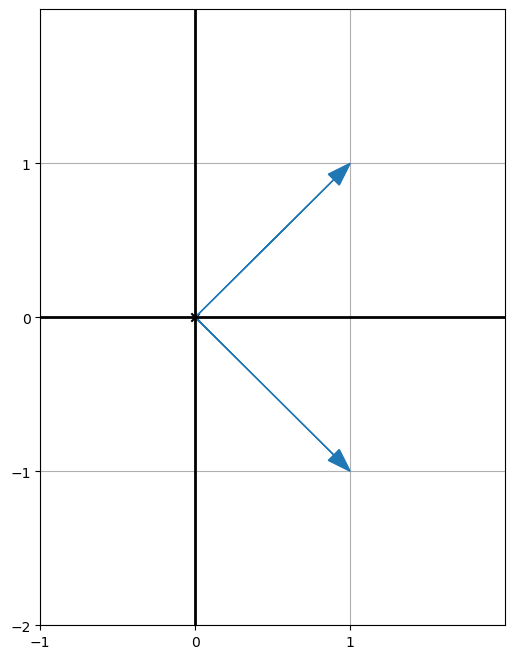

In [45]:
from vec2d.graph import draw, Arrow, Colors

draw(
    Arrow((1, 1), color=Colors.BLUE),
    Arrow((1, -1), color=Colors.BLUE),
)

So, the polar coordinates for $ (1, 1) $ are $ (\sqrt{2}, \frac{\pi}{4}) $, and the polar coordinates for $ (1, -1) $ are $ (\sqrt{2}, -\frac{\pi}{4}) $, or if you prefer, $ (\sqrt{2}, \frac{7\pi}{4}) $.

Let's validate it with our library:

In [51]:
from math import pi, sqrt
from vec2d.math import to_polar


assert to_polar((1, 1)) == (sqrt(2), pi / 4)
assert to_polar((1, -1)) == (sqrt(2), -pi / 4)
assert to_polar((1, -1), positive_angle=True) == (sqrt(2), 7 * pi / 4)

### Exercise

What is the angle of dinosaur's mouth? What is the angle of the dinosaur's toe? Of the point of its tail?

Let's first draw the dinosaur and identify the segments that identify the angles that we need to calculate in orange, red, and green respectively:

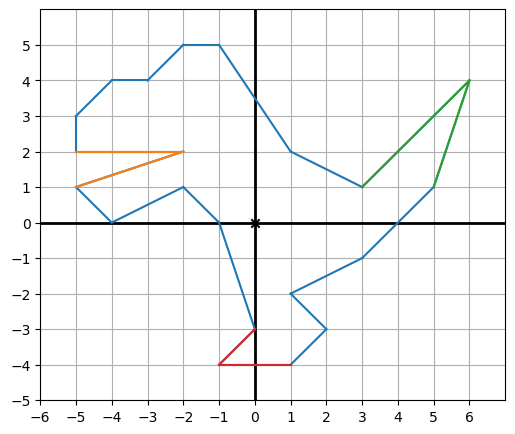

In [60]:
from vec2d.graph import draw, Polygon, Segment, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

mouth = [
    Segment((-2, 2), (-5, 2), color=Colors.ORANGE),
    Segment((-2, 2), (-5, 1), color=Colors.ORANGE),
]

toe = [
    Segment((-1, -4), (0, -3), color=Colors.RED),
    Segment((-1, -4), (1, -4), color=Colors.RED)
]

tail = [
    Segment((6, 4), (3, 1), color=Colors.GREEN),
    Segment((6, 4), (5, 1), color=Colors.GREEN)
]

draw(
    Polygon(*dino_points),
    *mouth,
    *toe,
    *tail
)


The calculation for the mouth is easy, as we can see it as a right triangle:

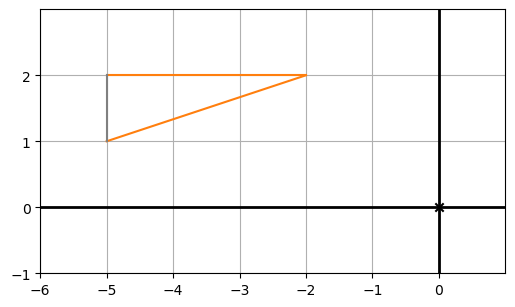

In [63]:
from vec2d.graph import draw, Segment, Colors


mouth_triangle = [
    Segment((-2, 2), (-5, 2), color=Colors.ORANGE),
    Segment((-2, 2), (-5, 1), color=Colors.ORANGE),
    Segment((-5, 2), (-5, 1), color=Colors.GRAY)
]

draw(
    *mouth_triangle
)

$
tan(\theta) = \frac{vertical}{horizontal} = \frac{1}{3}
$

In [64]:
from math import atan
from vec2d.math import to_degrees

angle_mouth = atan(1/3)
print(f"angle={angle_mouth} radians = {to_degrees(angle_mouth)}°")

angle=0.3217505543966422 radians = 18.43494882292201°


Similarly for the toe:



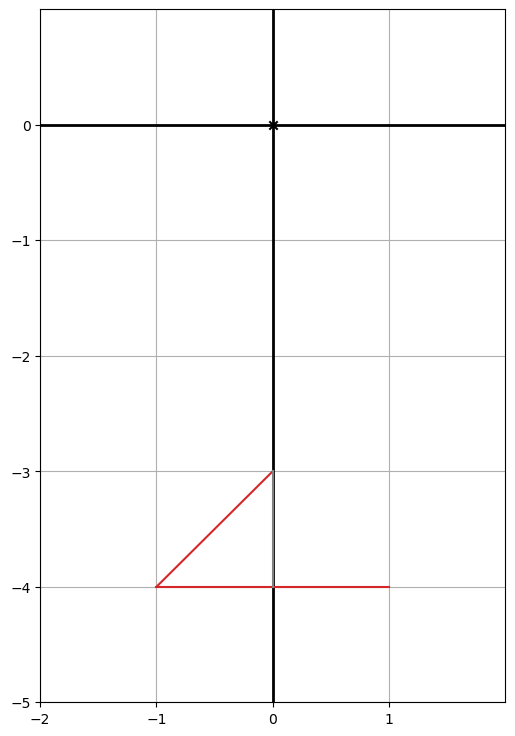

In [66]:
from vec2d.graph import draw, Segment, Colors

toe_triangle = [
    Segment((-1, -4), (0, -3), color=Colors.RED),
    Segment((-1, -4), (1, -4), color=Colors.RED),
    Segment((0, -3), (0, -4), color=Colors.GRAY)
]

draw(*toe_triangle)

$
tan(\theta) = \frac{vertical}{horizontal} = 1
$

Thus, $ \theta = 45° = \pi / 4 $

In [67]:
from math import atan
from vec2d.math import to_degrees

angle_mouth = atan(1)
print(f"angle={angle_mouth} radians = {to_degrees(angle_mouth)}°")

angle=0.7853981633974483 radians = 45.0°


The tail angle seems a bit daunting at first, because we're not dealing with a right triangle.

One way to do that is by delimiting two right triangles instead of one, and calculate the angle as the difference between the two.

Let's delimit one in green and one in brown. Note that both triangles share one side.

2023-10-15 10:03:53,430 [    INFO] (vec2d.graph.vector2d_graphics) | Using vec2d.graph v0.1.0


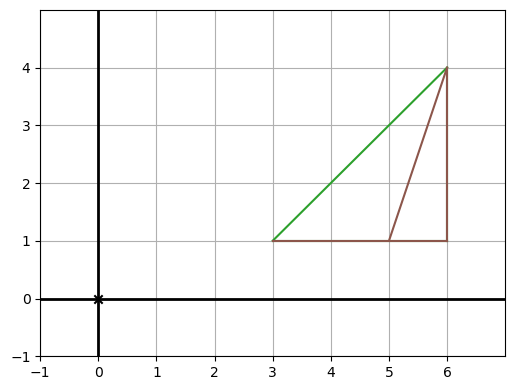

In [1]:
from vec2d.graph import draw, Segment, Colors

tail = [
    Segment((6, 4), (3, 1), color=Colors.GREEN),
    Segment((6, 4), (6, 1), color=Colors.GREEN),
    Segment((3, 1), (6, 1), color=Colors.GREEN),
    Segment((6, 4), (5, 1), color=Colors.BROWN),
    Segment((6, 4), (6, 1), color=Colors.BROWN),
    Segment((3, 1), (6, 1), color=Colors.BROWN),
]

draw(*tail)

Let's clarify with some values:

![Dino Tail angles](pics/dino_tail_angle.png)

As we can see:

$
\theta = \theta_1 - \theta_2
$

And both triangles are right triangles, so that:

$
tan(\theta_1) = \frac{b1}{a1} = \frac{3}{3} = 1 \Rightarrow \theta_1 = \frac{\pi}{4} rad = 45°
$

$
tan(\theta_2) = \frac{b2}{a2} = \frac{b2}{a2} = \frac{1}{3} \Rightarrow atan(\frac{1}{3}) = 18.435°
$

(see below)

In [8]:
from math import atan
from vec2d.math import to_degrees

print(f"theta_1 = {atan(1)} rad = {to_degrees(atan(1))}°")
print(f"theta_2 = {atan(1/3)} rad = {to_degrees(atan(1/3))}°")


theta_1 = 0.7853981633974483 rad = 45.0°
theta_2 = 0.3217505543966422 rad = 18.43494882292201°


Thus:

$
\theta = 45° - 18.435° = 26.565°
$

## Transforming collections of vectors

Collections of vectors store spatial data (like drawings) regardless of what coordinate system we use: polar or Cartesian.

As we can transform from one coordinate system to the other, we should use the system that is better suited for our purposes: translating is easy with Cartesian coordinates (and less so with polar coordinates), while carrying out rotations is easier with polar coordinates as they have the angle built-in.

In polar coordinates, adding to the angle rotates a vector further counterclockwise, while subtracting from it rotates the vector clockwise.

The following picture illustrates a given vector $ (1, 2) $ (in blue) and what happens when we add 1 (orange) and subtract 1 (green):

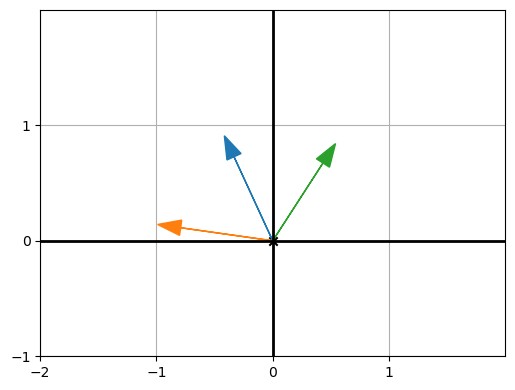

In [10]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import to_cartesian

draw(
    Arrow(to_cartesian((1, 2)), color=Colors.BLUE),
    Arrow(to_cartesian((1, 3)), color=Colors.ORANGE),
    Arrow(to_cartesian((1, 1)), color=Colors.GREEN),
)


Rotating a number of vectors simultaneously has the effect of rotating the figure they represent about the origin.

To illustrate it, the following snippet draws the dino in its original position (gray) and rotated by $ \pi /4 $ (red), so that it's facing the floor:

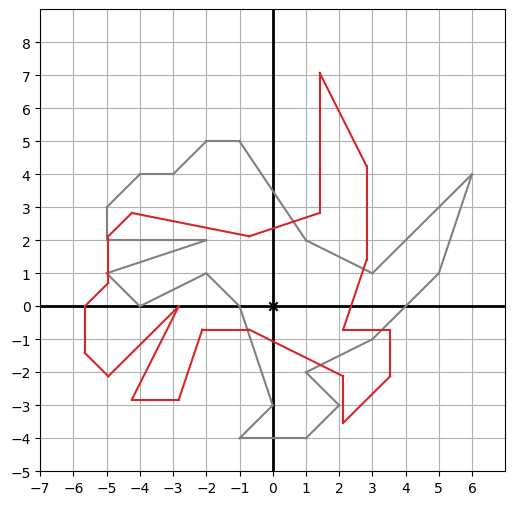

In [12]:
from math import pi
from vec2d.graph import draw, Polygon, Colors
from vec2d.math import to_cartesian, to_polar


dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]
dino_points_polar = [to_polar(p) for p in dino_points]
dino_point_rotated_polar = [(r, angle + pi / 4) for r, angle in dino_points_polar]
dino_points_rotated = [to_cartesian(p) for p in dino_point_rotated_polar]

draw(
    Polygon(*dino_points, color=Colors.GRAY),
    Polygon(*dino_points_rotated, color=Colors.RED),
)


### Combining vector transformations

At this point we know how to translate (move), rescale (make bigger or smaller), and rotate vectors.

We've also see that applying any of these transformations to a collection of vectors achieves the same effect on the shape that these define in the plane.

The final twist is to apply these vector transformations in sequence to be able to do things such as:

```python
new_dino = translate((8, 8), rotate(5 * pi / 3, dino_points))
```

Let's try that using the `rotate` function already included in the library

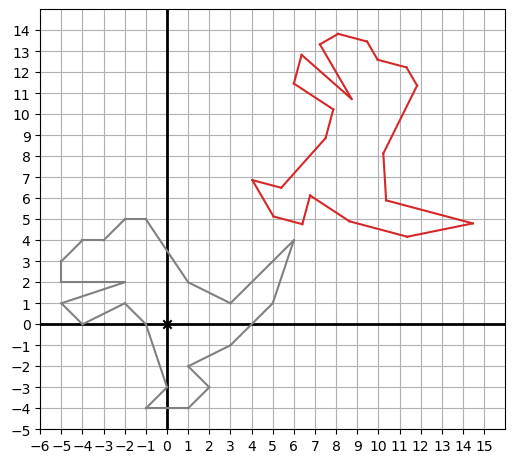

In [3]:
from math import pi
from vec2d.graph import draw, Polygon, Colors
from vec2d.math import rotate, translate

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]
new_dino = translate((8, 8), rotate(5 * pi / 3, dino_points))

draw(
    Polygon(*dino_points, color=Colors.GRAY),
    Polygon(*new_dino, color=Colors.RED)
)



And we can add one more *rescaling* step to make the rotated dino smaller.

2023-10-15 20:24:50,420 [    INFO] (vec2d.graph.vector2d_graphics) | Using vec2d.graph v0.1.0


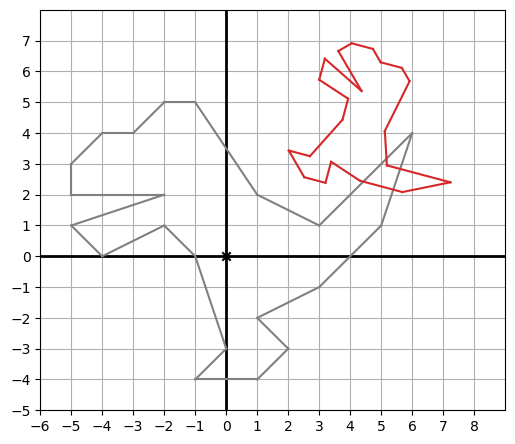

In [1]:
from math import pi
from vec2d.graph import draw, Polygon, Colors
from vec2d.math import rotate, translate, rescale

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]
new_dino = rescale(0.5, translate((8, 8), rotate(5 * pi / 3, dino_points)))

draw(
    Polygon(*dino_points, color=Colors.GRAY),
    Polygon(*new_dino, color=Colors.RED)
)

### Exercises

Create a function `rotate(angle, vectors)` that takes an array of input vectors in Cartesian coordinates and rotates those by the specified angle.

Validate the function by rotating the dino by $ \pi / 4 $.

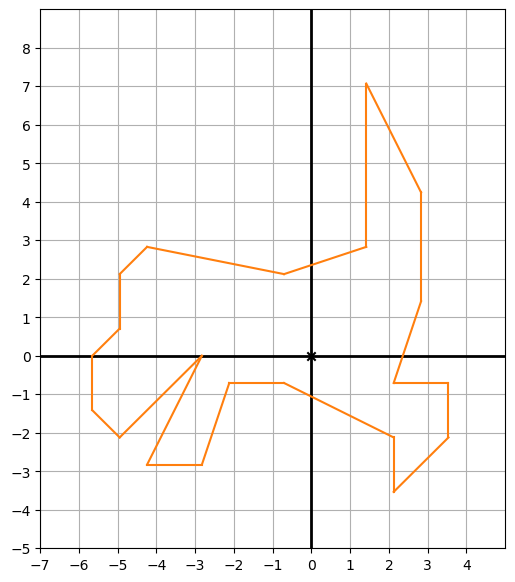

In [4]:
from math import pi
from vec2d.math import to_polar, to_cartesian
from vec2d.graph import draw, Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]


def rotate(angle, vectors):
    vectors_polar = [to_polar(v) for v in vectors]
    vectors_polar_rotated = [(r, theta + angle) for r, theta in vectors_polar]
    return [to_cartesian(v) for v in vectors_polar_rotated]


draw(
    Polygon(*rotate(pi / 4, dino_points), color=Colors.ORANGE)
)


The implementation can be further improved as adding the angle, and getting back the Cartesian coordinates can be performed in a single step:

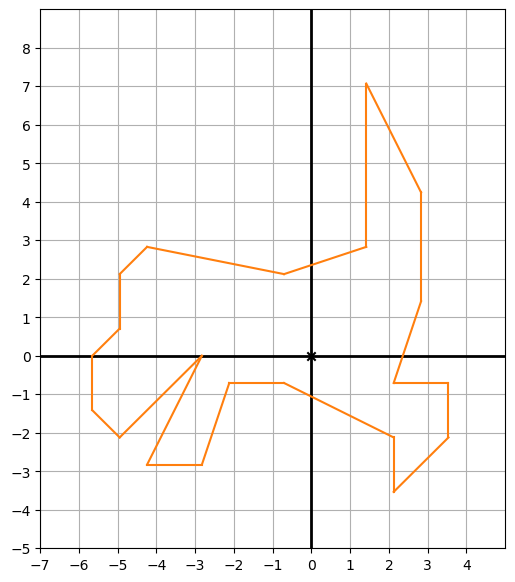

In [5]:
from math import pi
from vec2d.math import to_polar, to_cartesian
from vec2d.graph import draw, Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]


def rotate(angle, vectors):
    vectors_polar = [to_polar(v) for v in vectors]
    return [to_cartesian((r, theta + angle)) for r, theta in vectors_polar]


draw(
    Polygon(*rotate(pi / 4, dino_points), color=Colors.ORANGE)
)


### Exercise

Create a function `regular_polygon(n)` that returns the Cartesian coordinates for the vertices of a regular n-sided polygon.
> A regular polygon have all angles and side lengths equal.

For instance, `polygon(7)` should return a heptagon.

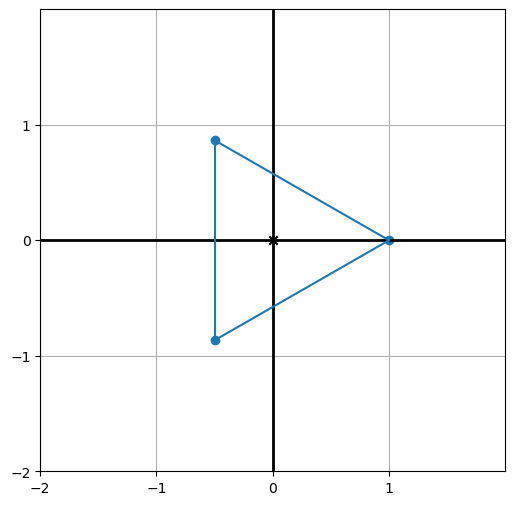

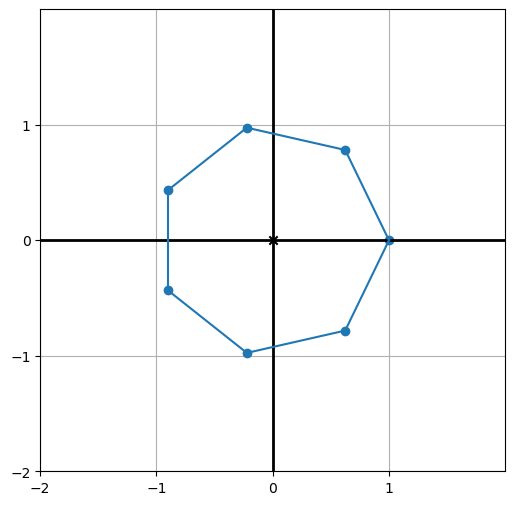

In [7]:
from math import pi
from vec2d.math import to_cartesian, to_polar
from vec2d.graph import draw, Points, Polygon, Colors


def regular_polygon(n):
    delta_angle = (2 * pi) / n
    points = [to_cartesian((1, delta_angle * i)) for i in range(n)]
    return points


triangle_points = regular_polygon(3)
draw(
    Points(*triangle_points, color=Colors.BLUE),
    Polygon(*triangle_points, color=Colors.BLUE)
)

heptagon_points = regular_polygon(7)
draw(
    Points(*heptagon_points, color=Colors.BLUE),
    Polygon(*heptagon_points, color=Colors.BLUE)
)


### Exercise

What is the result of first translating the dinosaur by the vector (8, 8) and then rotating it by $ 5 \pi/3 $? Is the result the same as rotating and translating? Why?

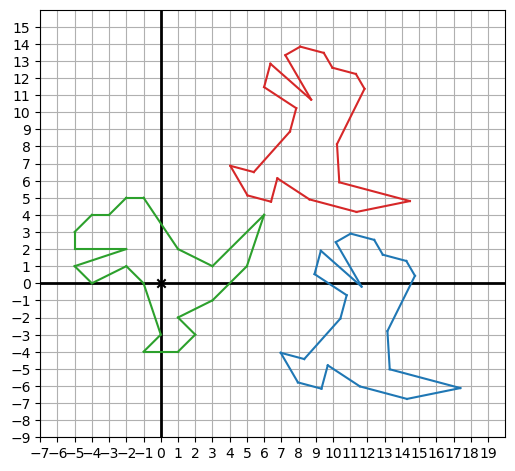

In [10]:
from math import pi
from vec2d.math import translate, rotate
from vec2d.graph import draw, Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

dino_red = translate((8, 8), rotate(5 * pi / 3, dino_points))
dino_blue = rotate(5 * pi / 3, translate((8, 8), dino_points))

draw(
    Polygon(*dino_points, color=Colors.GREEN),
    Polygon(*dino_red, color=Colors.RED),
    Polygon(*dino_blue, color=Colors.BLUE)
)



Let's understand why by doing the composition of actions step by step:

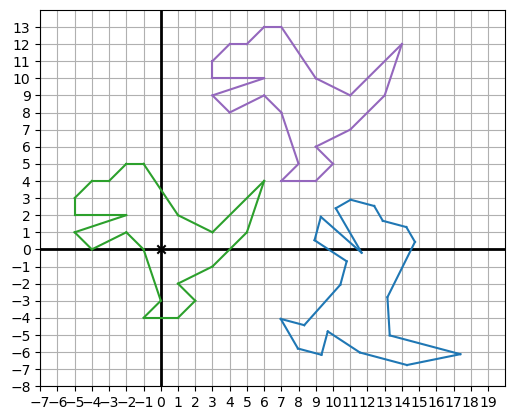

In [15]:
from math import pi
from vec2d.math import translate, rotate
from vec2d.graph import draw, Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

dino_red_1 = rotate(5 * pi / 3, dino_points)
dino_red_2 = translate((8, 8), dino_red_1)

dino_blue_1 = translate((8, 8), dino_points)
dino_blue_2 = rotate(5 * pi / 3, dino_blue_1)

draw(
    Polygon(*dino_points, color=Colors.GREEN),

    Polygon(*dino_red_1, color=Colors.GRAY),
    Polygon(*dino_red_2, color=Colors.RED),

    Polygon(*dino_blue_1, color=Colors.PURPLE),
    Polygon(*dino_blue_2, color=Colors.BLUE),
)


So in general, translating and then rotating will be different from rotating and then translating.

Initially, I'd be tempted to answer that it was going to render the same because I was thinking about rotating the figure, rather than rotating the figure point about the origin.

This can be clearly seen in the second drawing (see below):

The purple figure is not rotated, it's their points who are rotated $ 5 \pi / 3 $ about the origin.

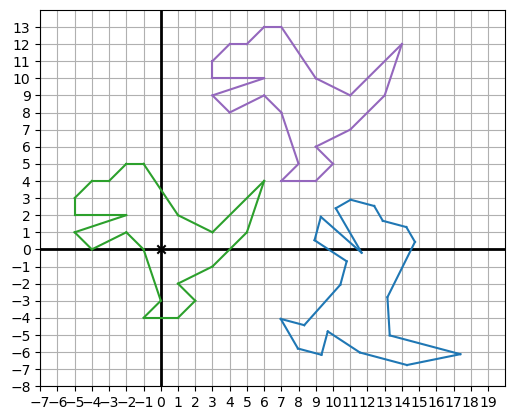

In [16]:
from math import pi
from vec2d.math import translate, rotate
from vec2d.graph import draw, Polygon, Colors

dino_points = [(-1, 0),(-2, 1),(-4, 0),(-5, 1),(-2, 2),(-5, 2),(-5, 3),(-4, 4),(-3, 4),(-2, 5),(-1, 5),(1, 2),(3, 1),(6, 4),(5, 1),(3, -1),(1, -2),(2, -3),(1, -4),(-1, -4),(0, -3)]

dino_red_1 = rotate(5 * pi / 3, dino_points)
dino_red_2 = translate((8, 8), dino_red_1)

dino_blue_1 = translate((8, 8), dino_points)
dino_blue_2 = rotate(5 * pi / 3, dino_blue_1)

draw(
    Polygon(*dino_points, color=Colors.GREEN),

    Polygon(*dino_blue_1, color=Colors.PURPLE),
    Polygon(*dino_blue_2, color=Colors.BLUE),
)


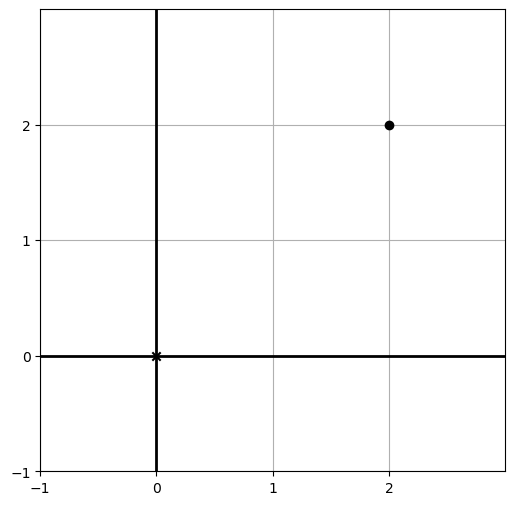

In [5]:
from vec2d.graph import draw, Points

draw(Points((2, 2)))